# **빅데이터개론 Lab 9 - 다중회귀분석(Multiple Linear Regression)**

- - -

참고자료 : https://www.notion.so/1e83a70a95474931beb46e23b8289b70




### **<다중선형회귀분석>**

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile1.uf.tistory.com%2Fimage%2F99A0813C5E1D430625C52A" width="500" height="300">

* **Multiple linear regression (다중회귀분석)**

  : 다중회귀분석은 설명변수(독립변수)가 2개 이상인 회귀분석

  : 다중회귀분석에서 설명변수 개수가 많을 경우, 적절한 회귀모형 선택이 필요함

  : 회귀모형에 포함되는 설명변수의 선정 기준
      ㄱ) 반응변수(종속변수)와 높은 상관관계
      ㄴ) 선택된 설명변수들은 서로 낮은 상관관계를 보임(다중공선성 문제)
      ㄷ) 설명변수의 개수는 적을수록 유리

      * 다중공선성 관련 링크 : https://learnx.tistory.com/entry/%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1Multicollinearity%EC%9D%B4%EB%9E%80

<br>

* **Feature selection (변수 선택법)**

  1) All possible regressions

  - 변수들의 가능한 모든 조합들로부터 최적의 모형을 찾아냄

  - 유의한 변수가 누락되지 않는 안전한 방법

  - 변수가 많을수록 탐색 시간이 급증함

  2) Forward stepwise selection (Forward selection)

  - 기여도가 높은 유의한 변수부터 하나씩 추가하는 기법

  - 빠른 계산이 장점

  - 이미 선택된 변수는 다시 제거되지 않음

  3) Backward stepwise selection (Backward elimination)

  - 모든 변수를 포함한 상태에서 불필요한 변수를 제거해나가는 방법

  - 중요한 변수가 제외될 가능성이 매우 적음

  - 이미 제외된 변수는 다시 선택되지 않음
  
  <br>

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile23.uf.tistory.com%2Fimage%2F999339425E1D4A5626C373" width="600" height="500">

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile5.uf.tistory.com%2Fimage%2F993971425E1D4A572FB764" width="600" height="500">


In [ ]:
install.packages(c("tidyverse", "data.table", "devtools", "scatterplot3d", "plotly","PerformanceAnalytics"))
library(tidyverse)
library(data.table)
library(devtools)
options(repr.plot.width=13, repr.plot.height=13)

Loading required package: usethis



- - -

#### **A. 예제 1**

https://github.com/kassambara/datarium

In [ ]:
install_github("kassambara/datarium")
library(datarium)

✔  checking for file ‘/tmp/Rtmpucq5C9/remotes643214e3ae/kassambara-datarium-f9f9b3a/DESCRIPTION’
─  preparing ‘datarium’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘datarium_0.1.0.999.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data("marketing", package = "datarium")
marketing %>% as_tibble() %>% show()

# A tibble: 200 x 4
   youtube facebook newspaper sales
     <dbl>    <dbl>     <dbl> <dbl>
 1   276.     45.4       83.0 26.5 
 2    53.4    47.2       54.1 12.5 
 3    20.6    55.1       83.2 11.2 
 4   182.     49.6       70.2 22.2 
 5   217.     13.0       70.1 15.5 
 6    10.4    58.7       90    8.64
 7    69      39.4       28.2 14.2 
 8   144.     23.5       13.9 15.8 
 9    10.3     2.52       1.2  5.76
10   240.      3.12      25.4 12.7 
# … with 190 more rows


In [ ]:
str(marketing)

'data.frame':	200 obs. of  4 variables:
 $ youtube  : num  276.1 53.4 20.6 181.8 217 ...
 $ facebook : num  45.4 47.2 55.1 49.6 13 ...
 $ newspaper: num  83 54.1 83.2 70.2 70.1 ...
 $ sales    : num  26.5 12.5 11.2 22.2 15.5 ...


* boxplot

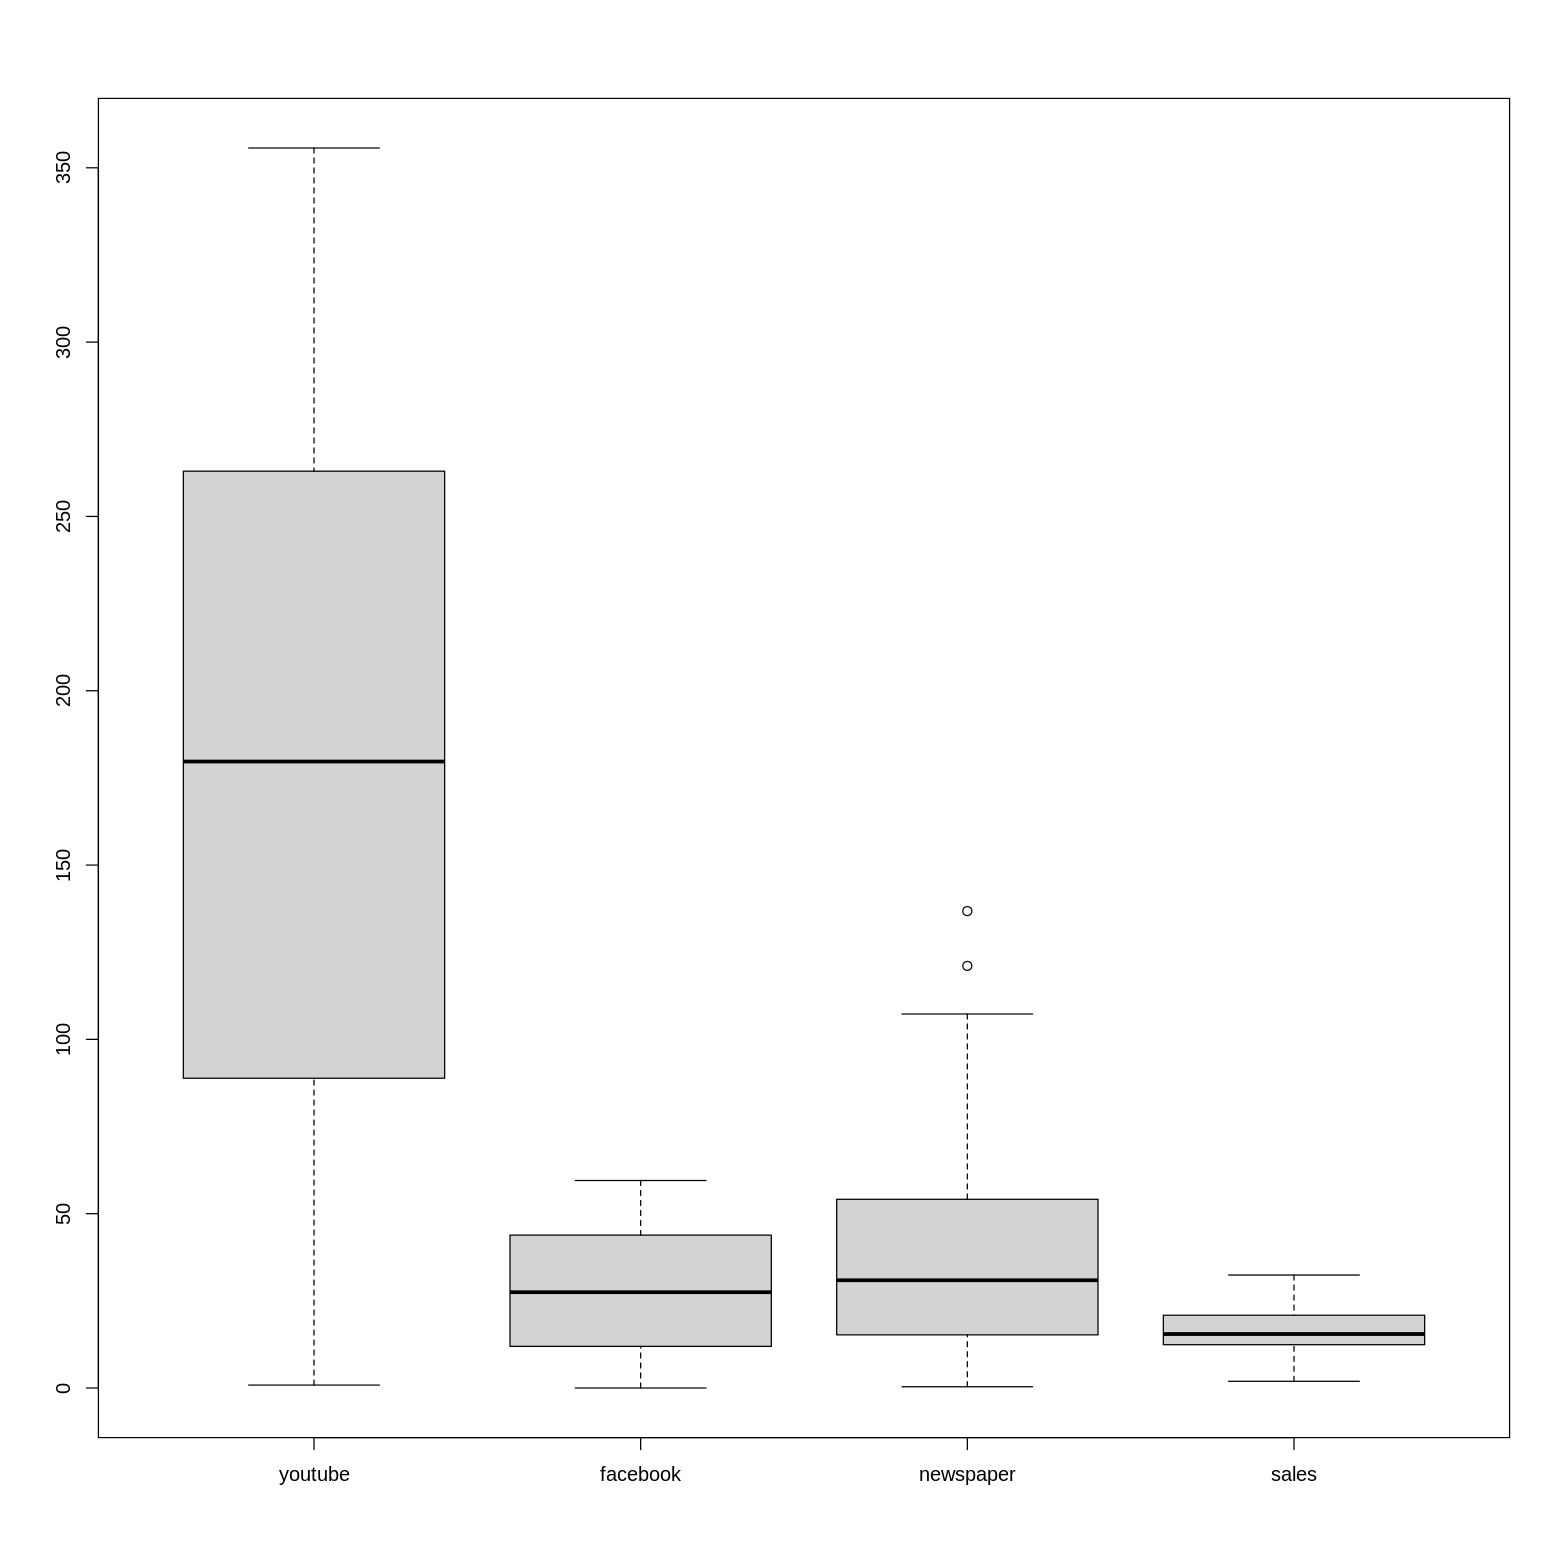

In [ ]:
# boxplot을 이용한 outlier 확인 및 제거(?)
boxplot(marketing)

In [ ]:
str(boxplot(marketing, plot = F))

List of 6
 $ stats: num [1:5, 1:4] 0.84 88.86 179.7 262.98 355.68 ...
 $ n    : num [1:4] 200 200 200 200
 $ conf : num [1:2, 1:4] 160.2 199.2 23.9 31 26.6 ...
 $ out  : num [1:2] 137 121
 $ group: num [1:2] 3 3
 $ names: chr [1:4] "youtube" "facebook" "newspaper" "sales"


* scatter plot

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘xts’


The following objects are masked from ‘package:data.table’:

    first, last


The following objects are masked from ‘package:dplyr’:

    first, last



Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend




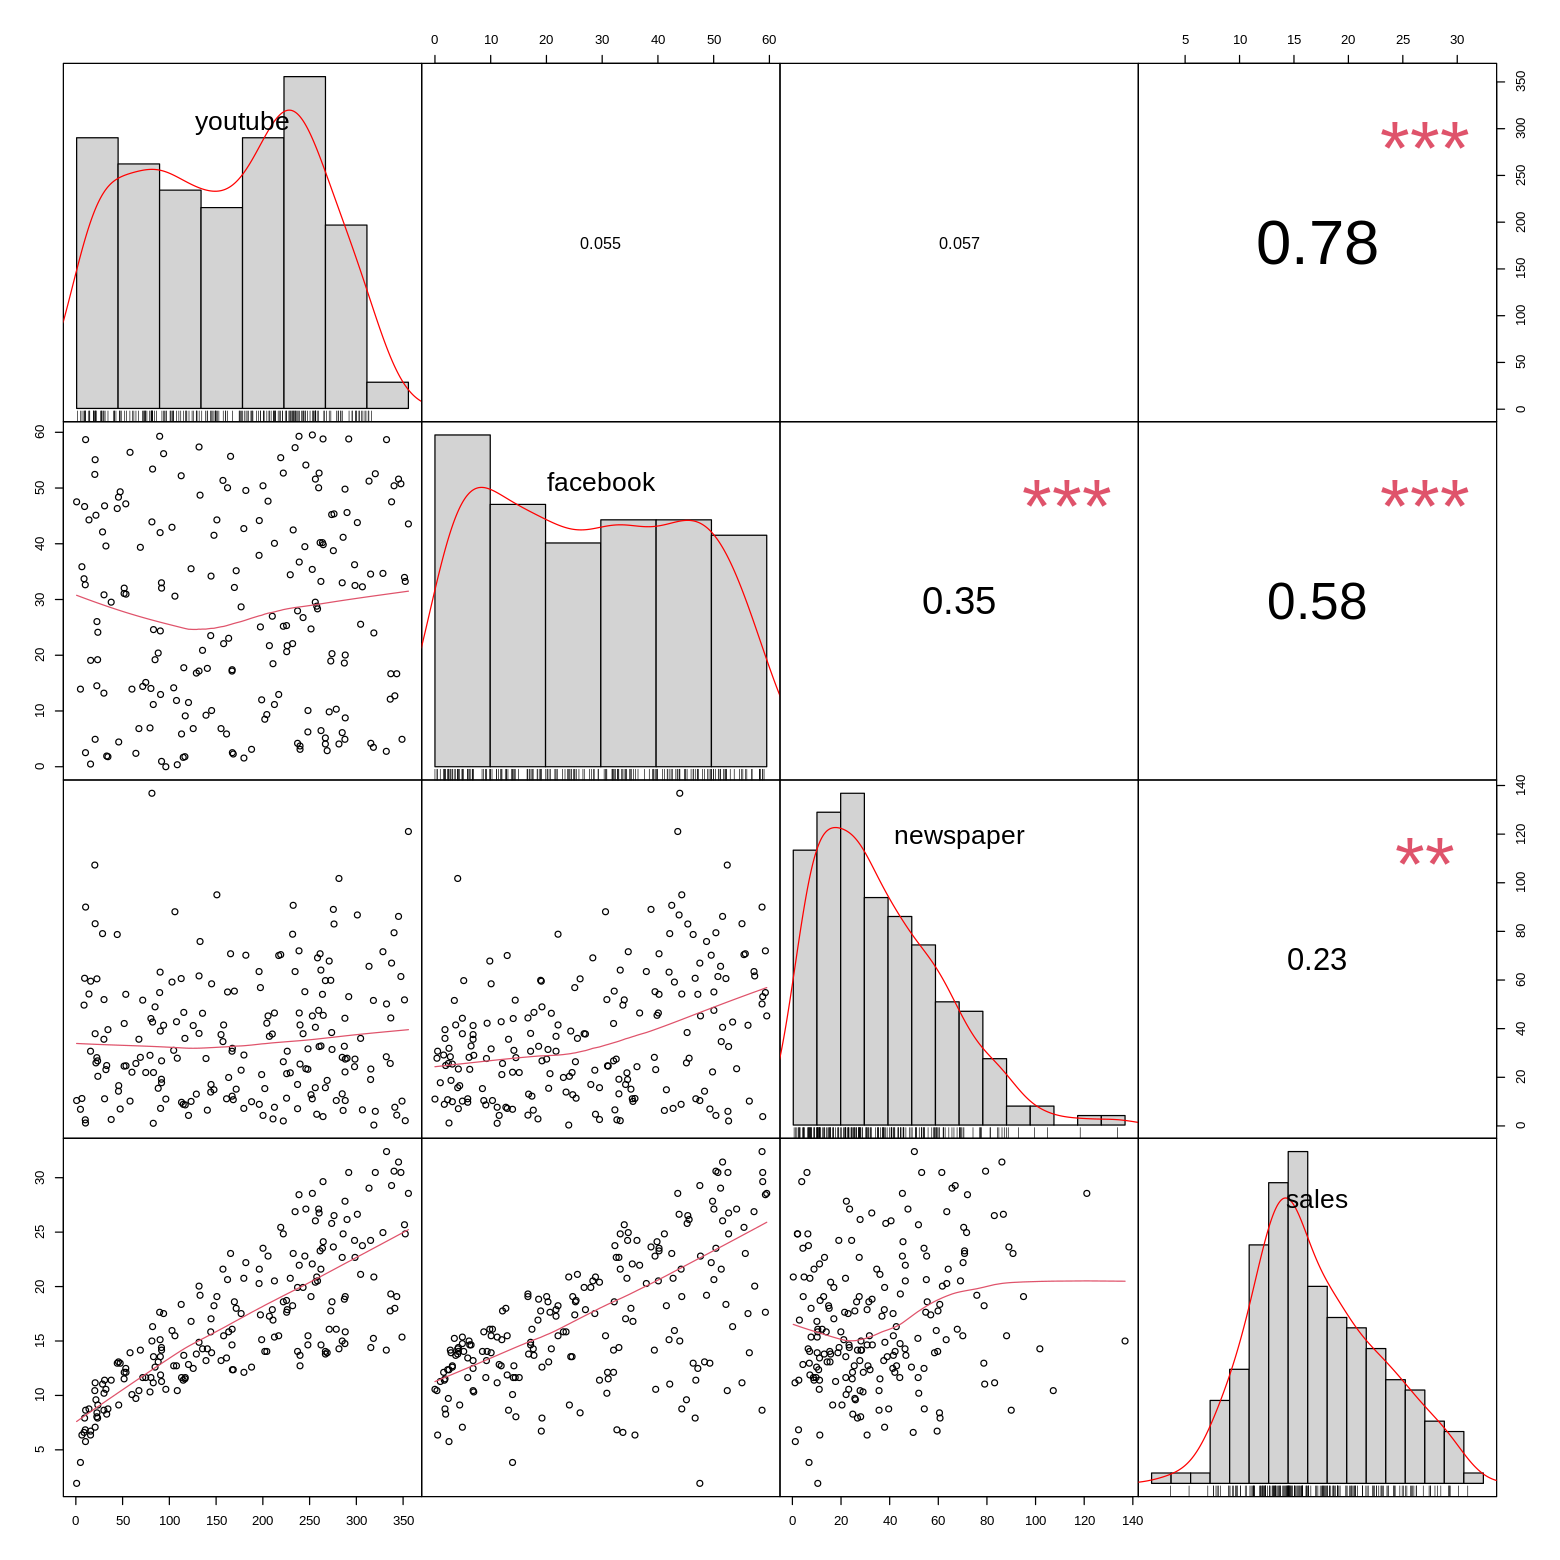

In [ ]:
library(PerformanceAnalytics)
chart.Correlation(marketing, histogram=TRUE, pch=19)

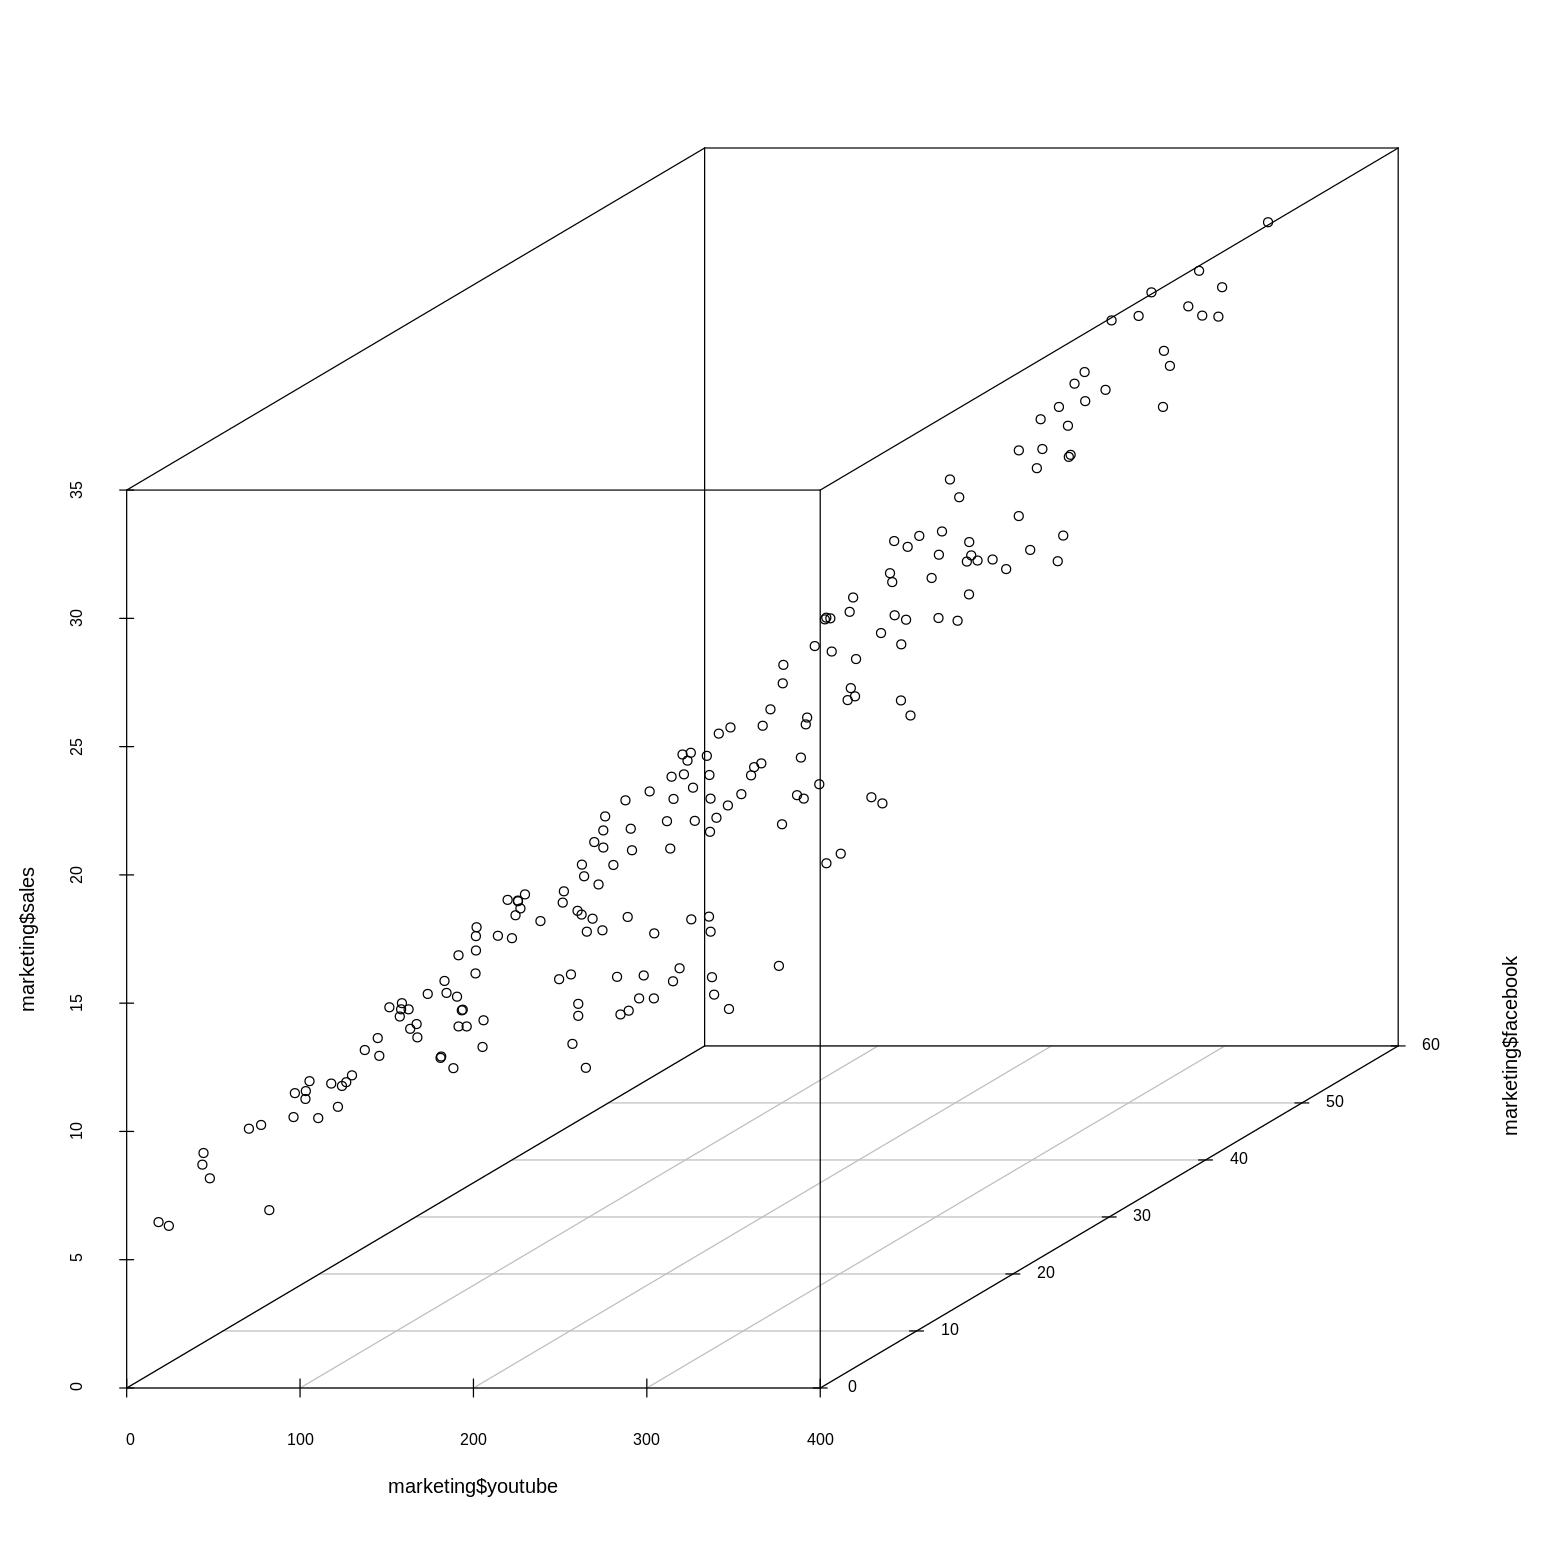

In [ ]:
library(scatterplot3d)
scatterplot3d(marketing$youtube, marketing$facebook, marketing$sales, angle = 40)

In [ ]:
# plotly를 이용한 3d Sactterplot(https://plotly.com/r/3d-scatter-plots/)
# https://m.blog.naver.com/PostView.nhn?blogId=pmw9440&logNo=221590897819&proxyReferer=https:%2F%2Fwww.google.com%2F
# ftp://210.115.229.94/plotly_3d_scatter.html
library(plotly)
fig <- plot_ly(marketing, x = ~youtube, y = ~facebook, z = ~sales, color = ~sales)
fig <- fig %>% add_markers()
fig <- fig %>% layout(scene = list(xaxis = list(title = 'YOUTUBE'),
                                   yaxis = list(title = 'FACEBOOK'),
                                   zaxis = list(title = 'SALES')))
                        
htmlwidgets::saveWidget(fig, file = "3d_scatter.html")

* **회귀식 추정**
``sales = b0 + b1 * youtube + b2 * facebook + b3 * newspaper ``


In [ ]:
model <- lm(sales ~ youtube + facebook + newspaper, data = marketing)
model


Call:
lm(formula = sales ~ youtube + facebook + newspaper, data = marketing)

Coefficients:
(Intercept)      youtube     facebook    newspaper  
   3.526667     0.045765     0.188530    -0.001037  


* 회귀식 도출
* ```
b0 = 3.52667, b1 = 0.045765, b2 = 0.188530, b3 = -0.001037 으로부터 
sales = 3.52667 + 0.045765 * youtube + 0.188530 * facebook + -0.001037 * newspaper
```


* youtube, facebook, newspaper이 각각 1 증가할 때, sales가 0.045765, 0.188530, -0.001037이 증가

In [ ]:
summary(model)


Call:
lm(formula = sales ~ youtube + facebook + newspaper, data = marketing)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5932  -1.0690   0.2902   1.4272   3.3951 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.526667   0.374290   9.422   <2e-16 ***
youtube      0.045765   0.001395  32.809   <2e-16 ***
facebook     0.188530   0.008611  21.893   <2e-16 ***
newspaper   -0.001037   0.005871  -0.177     0.86    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.023 on 196 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8956 
F-statistic: 570.3 on 3 and 196 DF,  p-value: < 2.2e-16


<결과의 해석>
```
** m1 모델 **
1. 제일 밑에 F-statistic의 p-value 값은 2.2e-16 로 0.05보다 작기에 이 회귀식은 회귀분석 모델 전체에 대해 통계적으로 의미가 있다고 볼 수 있다.

2. 중간의 Coefficients:에는 y절편 값(Intercept) 및 변수들의 p-value 값이 나와있다. 
newspaper 변수의 경우 0.86으로 0.05보다 크기에 sales를 설명하는데 유의하지 않다.

3. 밑 부분의 Adjusted R-squared 값은 0.8956로, 89%만큼의 설명력을 가진다고 판단할 수 있다.
```

**<유의하지 않은 변수 제거>**

  * 위 다중회귀분석 결과에서 age와 ptl 변수가 유의하지 않은 것으로 확인됨

  * 아래의 3가지 방법 중 하나로, 유의하지 않은 변수를 제거할 수 있음

```
1) 유의하지 않은 변수를 누락하고 회귀모형을 새롭게 정의
model_2 <- lm(sales ~ youtube + facebook, data = marketing)

2) update 함수를 사용하여, 기존 회귀모형에서 유의하지 않은 변수 제거
model_2 <- update(model, .~. -newspaper)

3) step 함수를 사용하여, 기존 회귀모형에서 유의하지 않은 변수를 제거해나감
model_2 <- step(model, direction = "backward")
```

In [ ]:
# 1 번 방법
lm(sales ~ youtube + facebook, data = marketing)


Call:
lm(formula = sales ~ youtube + facebook, data = marketing)

Coefficients:
(Intercept)      youtube     facebook  
    3.50532      0.04575      0.18799  


In [ ]:
# 2 번 방법(update 사용)
update(model, .~. -newspaper)


Call:
lm(formula = sales ~ youtube + facebook, data = marketing)

Coefficients:
(Intercept)      youtube     facebook  
    3.50532      0.04575      0.18799  


In [ ]:
# 3 번 방법(step)
step(model, direction = "backward")

Start:  AIC=285.72
sales ~ youtube + facebook + newspaper

            Df Sum of Sq    RSS    AIC
- newspaper  1       0.1  802.0 283.75
<none>                    801.8 285.72
- facebook   1    1960.9 2762.7 531.13
- youtube    1    4403.5 5205.4 657.83

Step:  AIC=283.75
sales ~ youtube + facebook

           Df Sum of Sq    RSS    AIC
<none>                   802.0 283.75
- facebook  1    2225.7 3027.6 547.44
- youtube   1    4408.7 5210.6 656.03



Call:
lm(formula = sales ~ youtube + facebook, data = marketing)

Coefficients:
(Intercept)      youtube     facebook  
    3.50532      0.04575      0.18799  


In [ ]:
# 변수의 상대적 중요도 파악
# https://rpubs.com/cardiomoon/152770
factor2number=function(df){
    select=sapply(df,function(x) {is.factor(x)})
    if(sum(select)==1) df[[which(select)]]<-as.numeric(df[[which(select)]])
    else if(sum(select)>1) df[,select]<-lapply(df[,select],as.numeric)
    df
}

chr2factor=function(df){
    select=sapply(df,function(x) {is.character(x)})
    df[,select]<-lapply(df[,select],factor)
    df
}

relweights <- function(fit,plot=FALSE,...){
    df<-fit$model
    df1<-chr2factor(df)
    df2<-factor2number(df1)
    
    R <- cor(df2)
    nvar <- ncol(R)
    rxx <- R[2:nvar, 2:nvar]
    rxy <- R[2:nvar, 1]
    svd <- eigen(rxx)
    evec <- svd$vectors
    ev <- svd$values
    delta <- diag(sqrt(ev))
    lambda <- evec %*% delta %*% t(evec)
    lambdasq <- lambda ^ 2
    beta <- solve(lambda) %*% rxy
    rsquare <- colSums(beta ^ 2)
    rawwgt <- lambdasq %*% beta ^ 2
    import <- (rawwgt / rsquare) * 100
    import <- as.data.frame(import)
    row.names(import) <- names(fit$model[2:nvar])
    names(import) <- "Weights"
    import <- import[order(import),1, drop=FALSE]
    if(plot) {
        dotchart(import$Weights, labels=row.names(import),
                 xlab="% of R-Square", pch=19,
                 main="Relative Importance of Predictor Variables",
                 sub=paste("Total R-Square=", round(rsquare, digits=3)),
                 ...)
    }  
    attr(import,"R-square")<-round(rsquare, digits=3)
    return(import)
}

plotRelWeights=function(fit){
       data<-relweights(fit)
       data$Predictors<-rownames(data)
       p<-ggplot(data=data,aes(x=reorder(Predictors,Weights),y=Weights,fill=Predictors))+ 
           geom_bar(stat="identity",width=0.5)+
           ggtitle("Relative Importance of Predictor Variables")+
           ylab(paste0("% of R-square \n(Total R-Square=",attr(data,"R-square"),")"))+
           geom_text(aes(y=Weights-0.1,label=paste(round(Weights,1),"%")),hjust=1)+
           guides(fill=FALSE)+
           coord_flip()
       p
   }



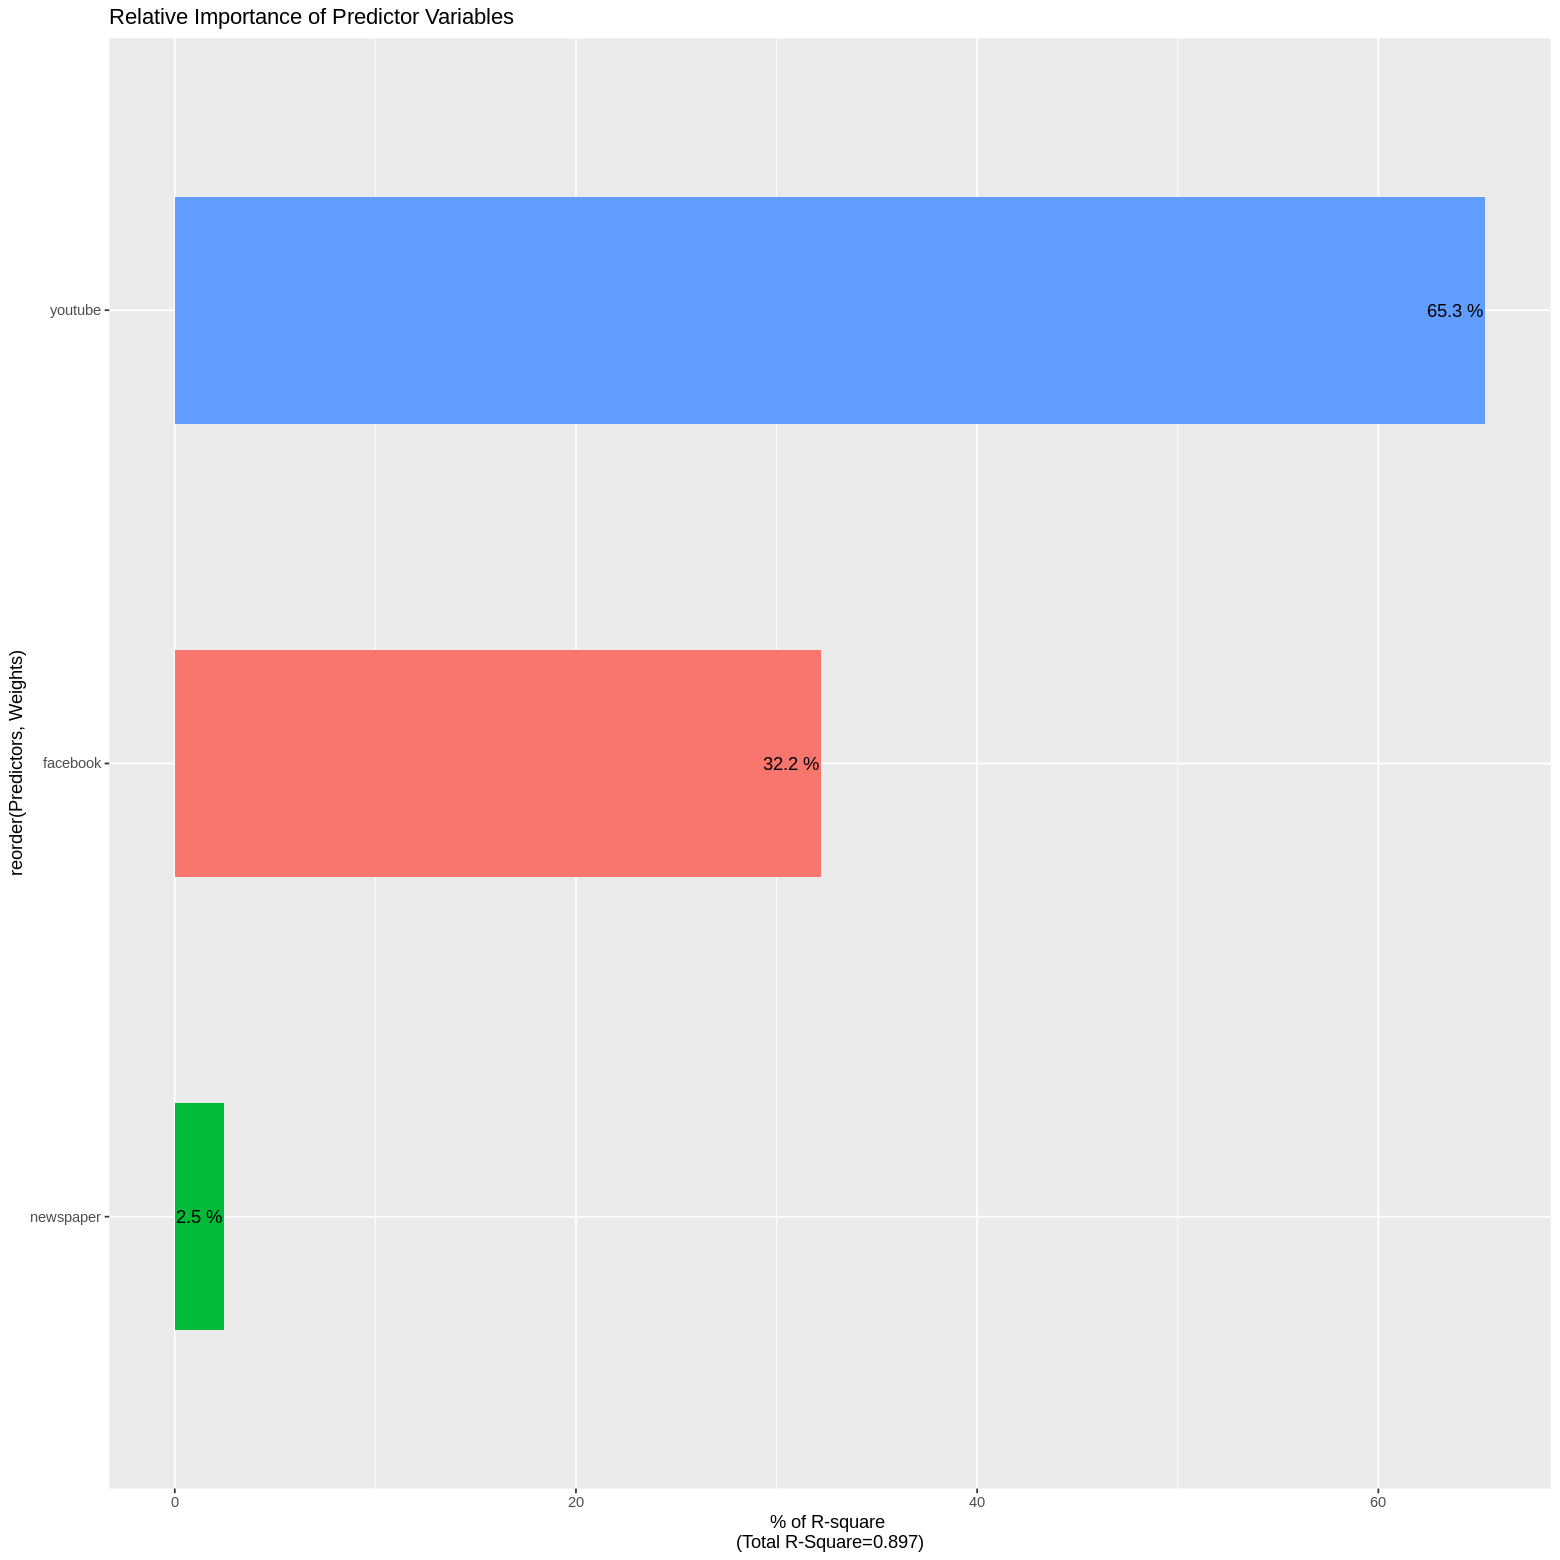

In [ ]:
plotRelWeights(model)

Start:  AIC=285.72
sales ~ youtube + facebook + newspaper

            Df Sum of Sq    RSS    AIC
- newspaper  1       0.1  802.0 283.75
<none>                    801.8 285.72
- facebook   1    1960.9 2762.7 531.13
- youtube    1    4403.5 5205.4 657.83

Step:  AIC=283.75
sales ~ youtube + facebook

           Df Sum of Sq    RSS    AIC
<none>                   802.0 283.75
- facebook  1    2225.7 3027.6 547.44
- youtube   1    4408.7 5210.6 656.03


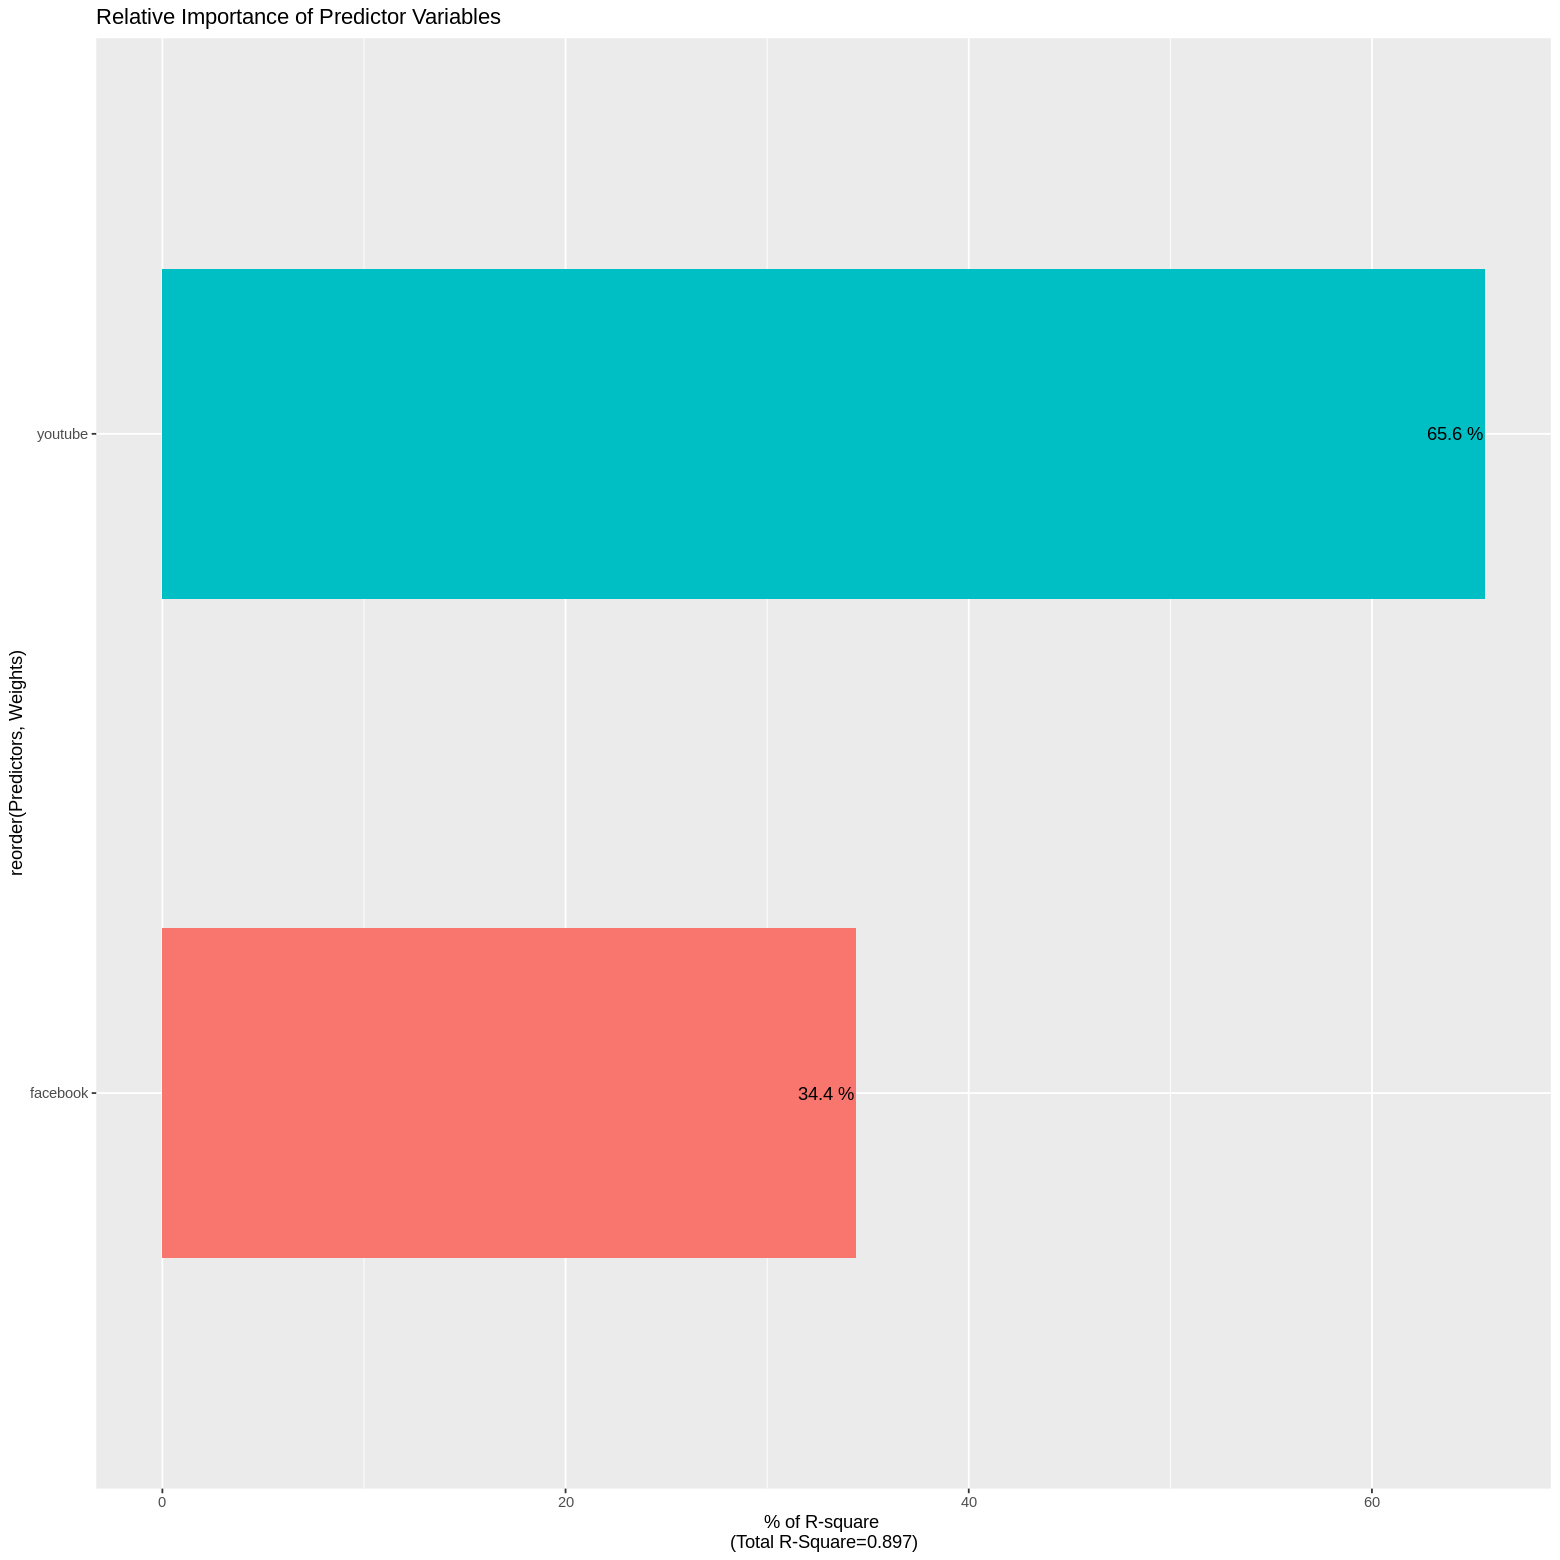

In [ ]:
model_2 <- step(model, direction = "backward")
plotRelWeights(model_2)

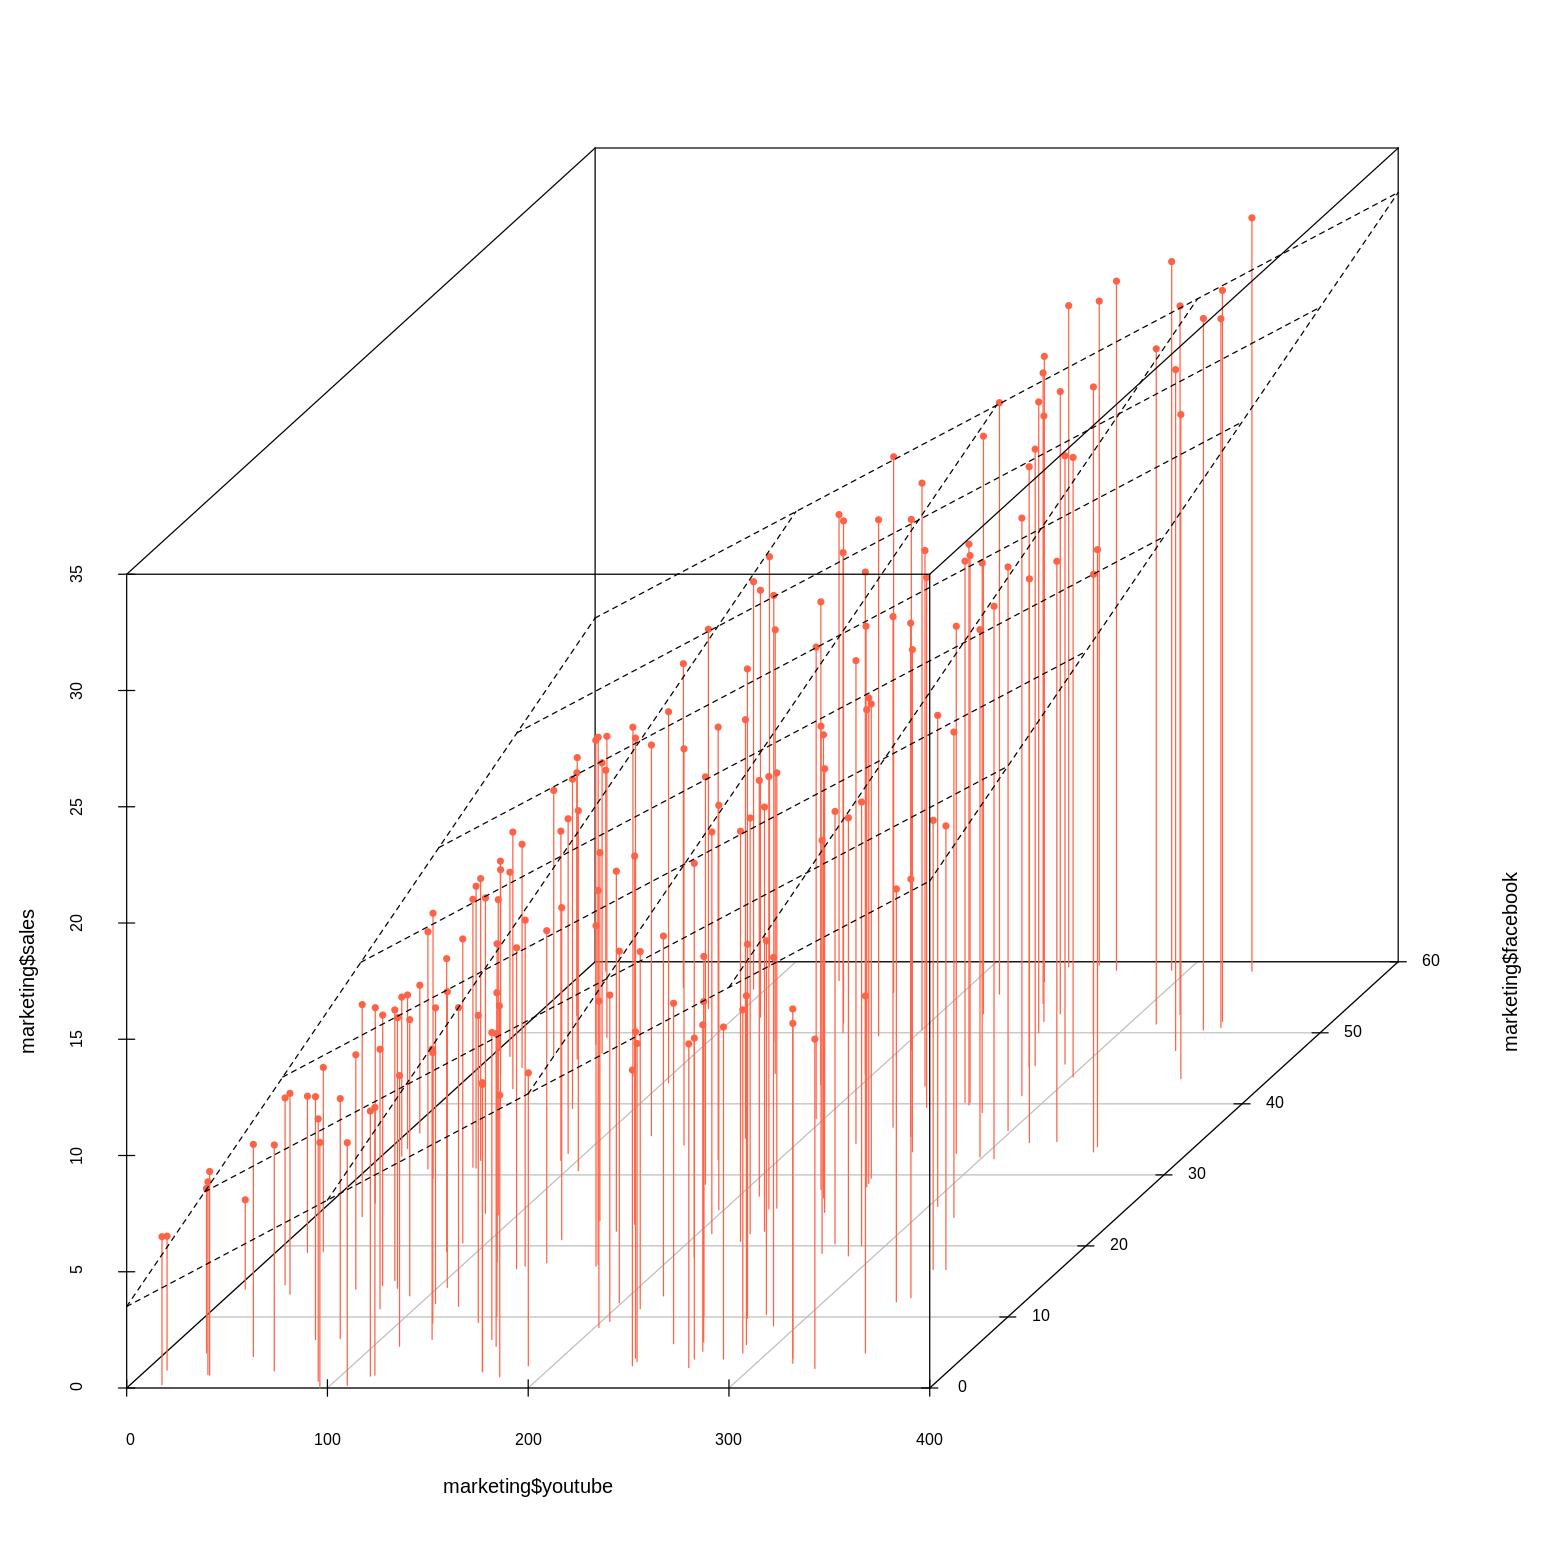

In [ ]:
# 3d 산점도
library(scatterplot3d)

s <- scatterplot3d(marketing$youtube, marketing$facebook, marketing$sales, pch = 20, type = 'h', angle = 55, color = "tomato")
s$plane3d(model_2)

* **예측**

In [ ]:
# test 데이터 생성
set.seed(51)
youtube_r <- sample(min(marketing$youtube):max(marketing$youtube), 60, replace = F)
facebook_r <- sample(min(marketing$facebook):max(marketing$facebook), 60, replace = F)

new_data <- tibble(youtube = youtube_r, facebook = facebook_r)
new_data

youtube,facebook
<dbl>,<int>
166.84,16
338.84,24
92.84,10
45.84,8
90.84,56
148.84,50
193.84,36
119.84,28
293.84,32


In [ ]:
# predict
sales_r <- predict(model_2, new_data)
new_data <- new_data %>% bind_cols(tibble(sales_predict = sales_r))
new_data %>% show()

# A tibble: 60 x 3
   youtube facebook sales_predict
     <dbl>    <int>         <dbl>
 1   167.        16         14.1 
 2   339.        24         23.5 
 3    92.8       10          9.63
 4    45.8        8          7.11
 5    90.8       56         18.2 
 6   149.        50         19.7 
 7   194.        36         19.1 
 8   120.        28         14.3 
 9   294.        32         23.0 
10   165.        43         19.1 
# … with 50 more rows


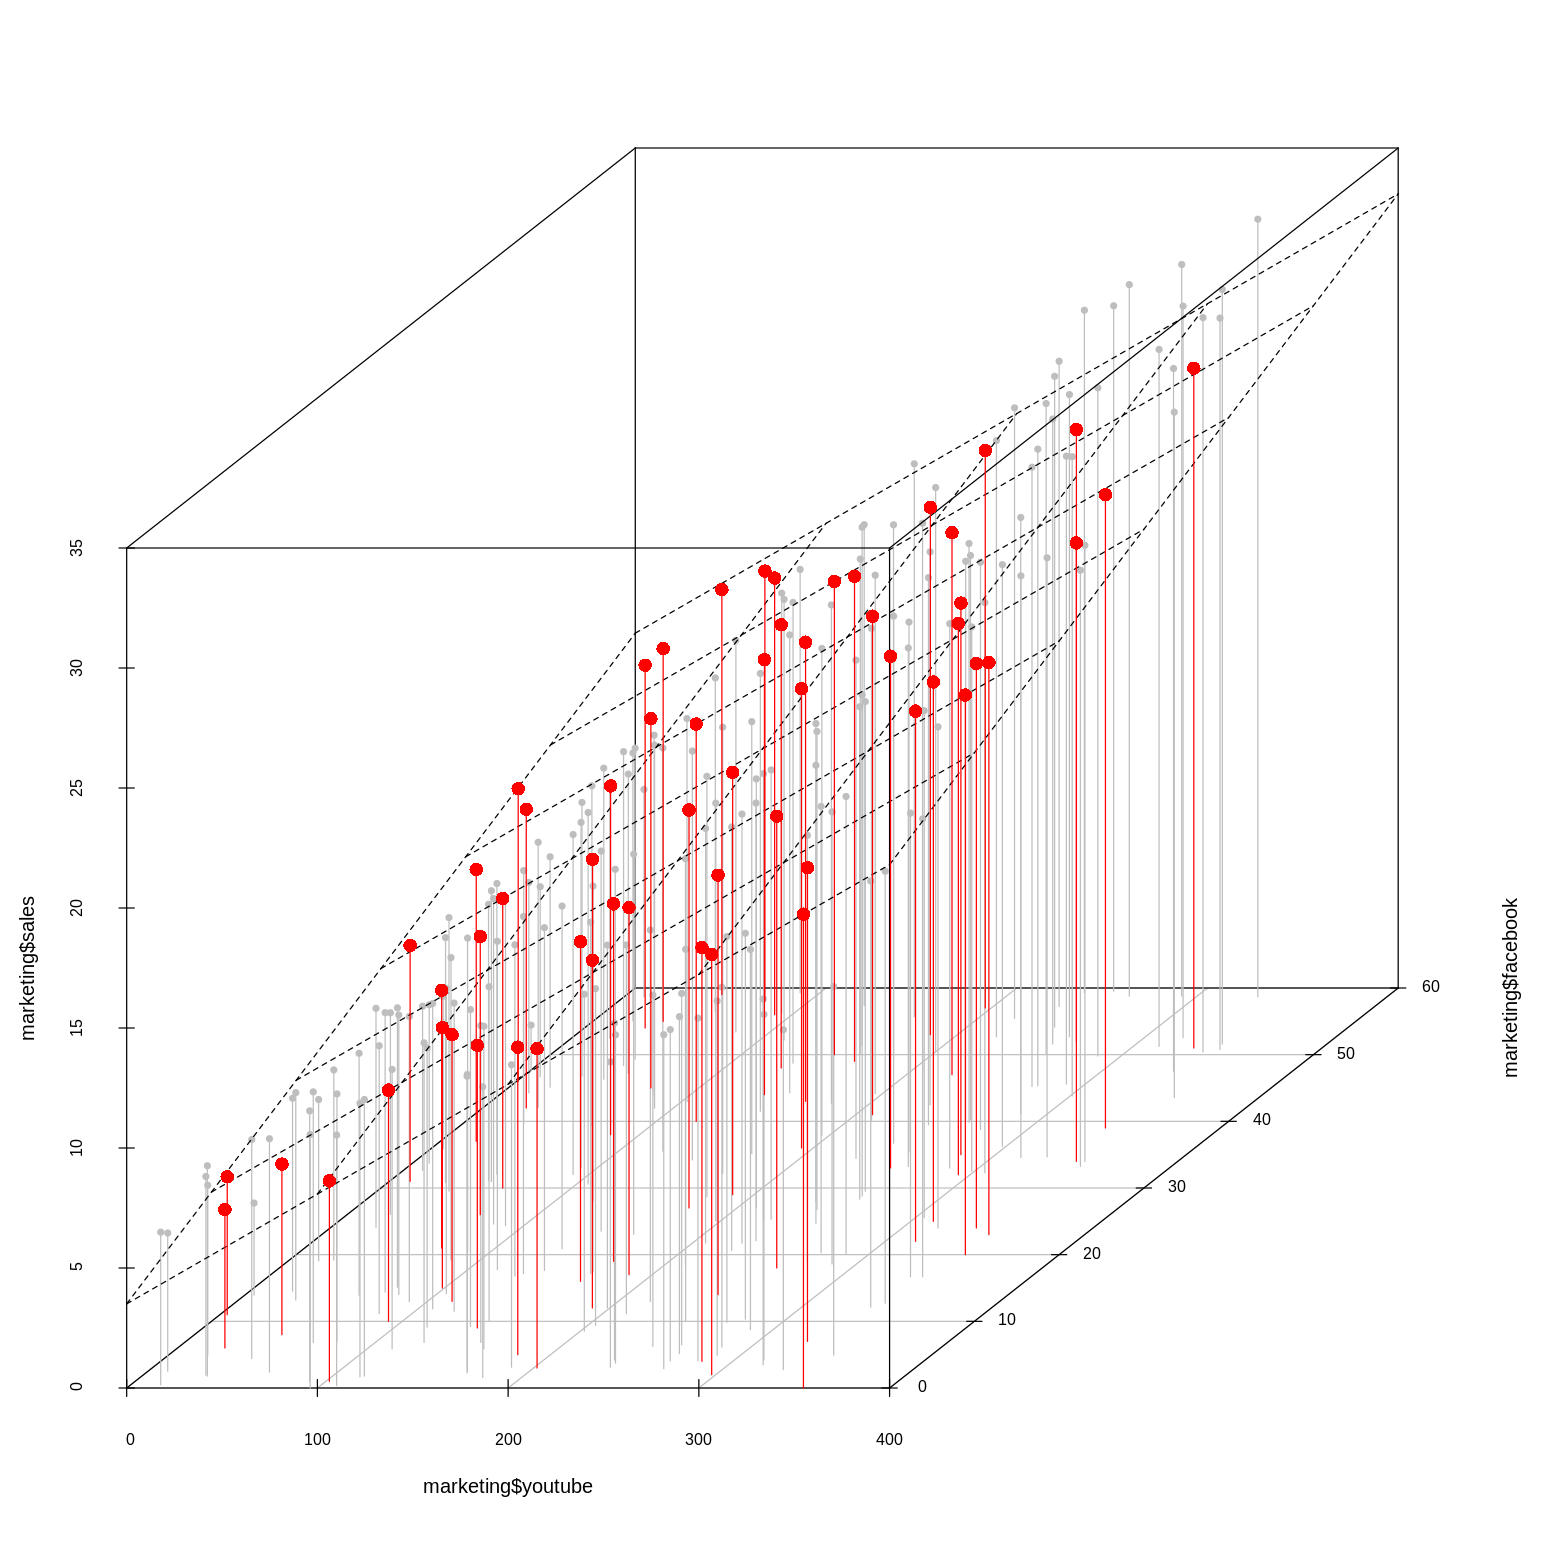

In [ ]:
# Add supplementary points
s <- scatterplot3d(marketing$youtube, marketing$facebook, marketing$sales, pch = 20, type = 'h', angle = 50, color = "grey")
s$plane3d(model_2)
s$points3d(new_data$youtube, new_data$facebook, new_data$sales_predict, col = "red", type = "h", pch = 16, cex = 1.5)

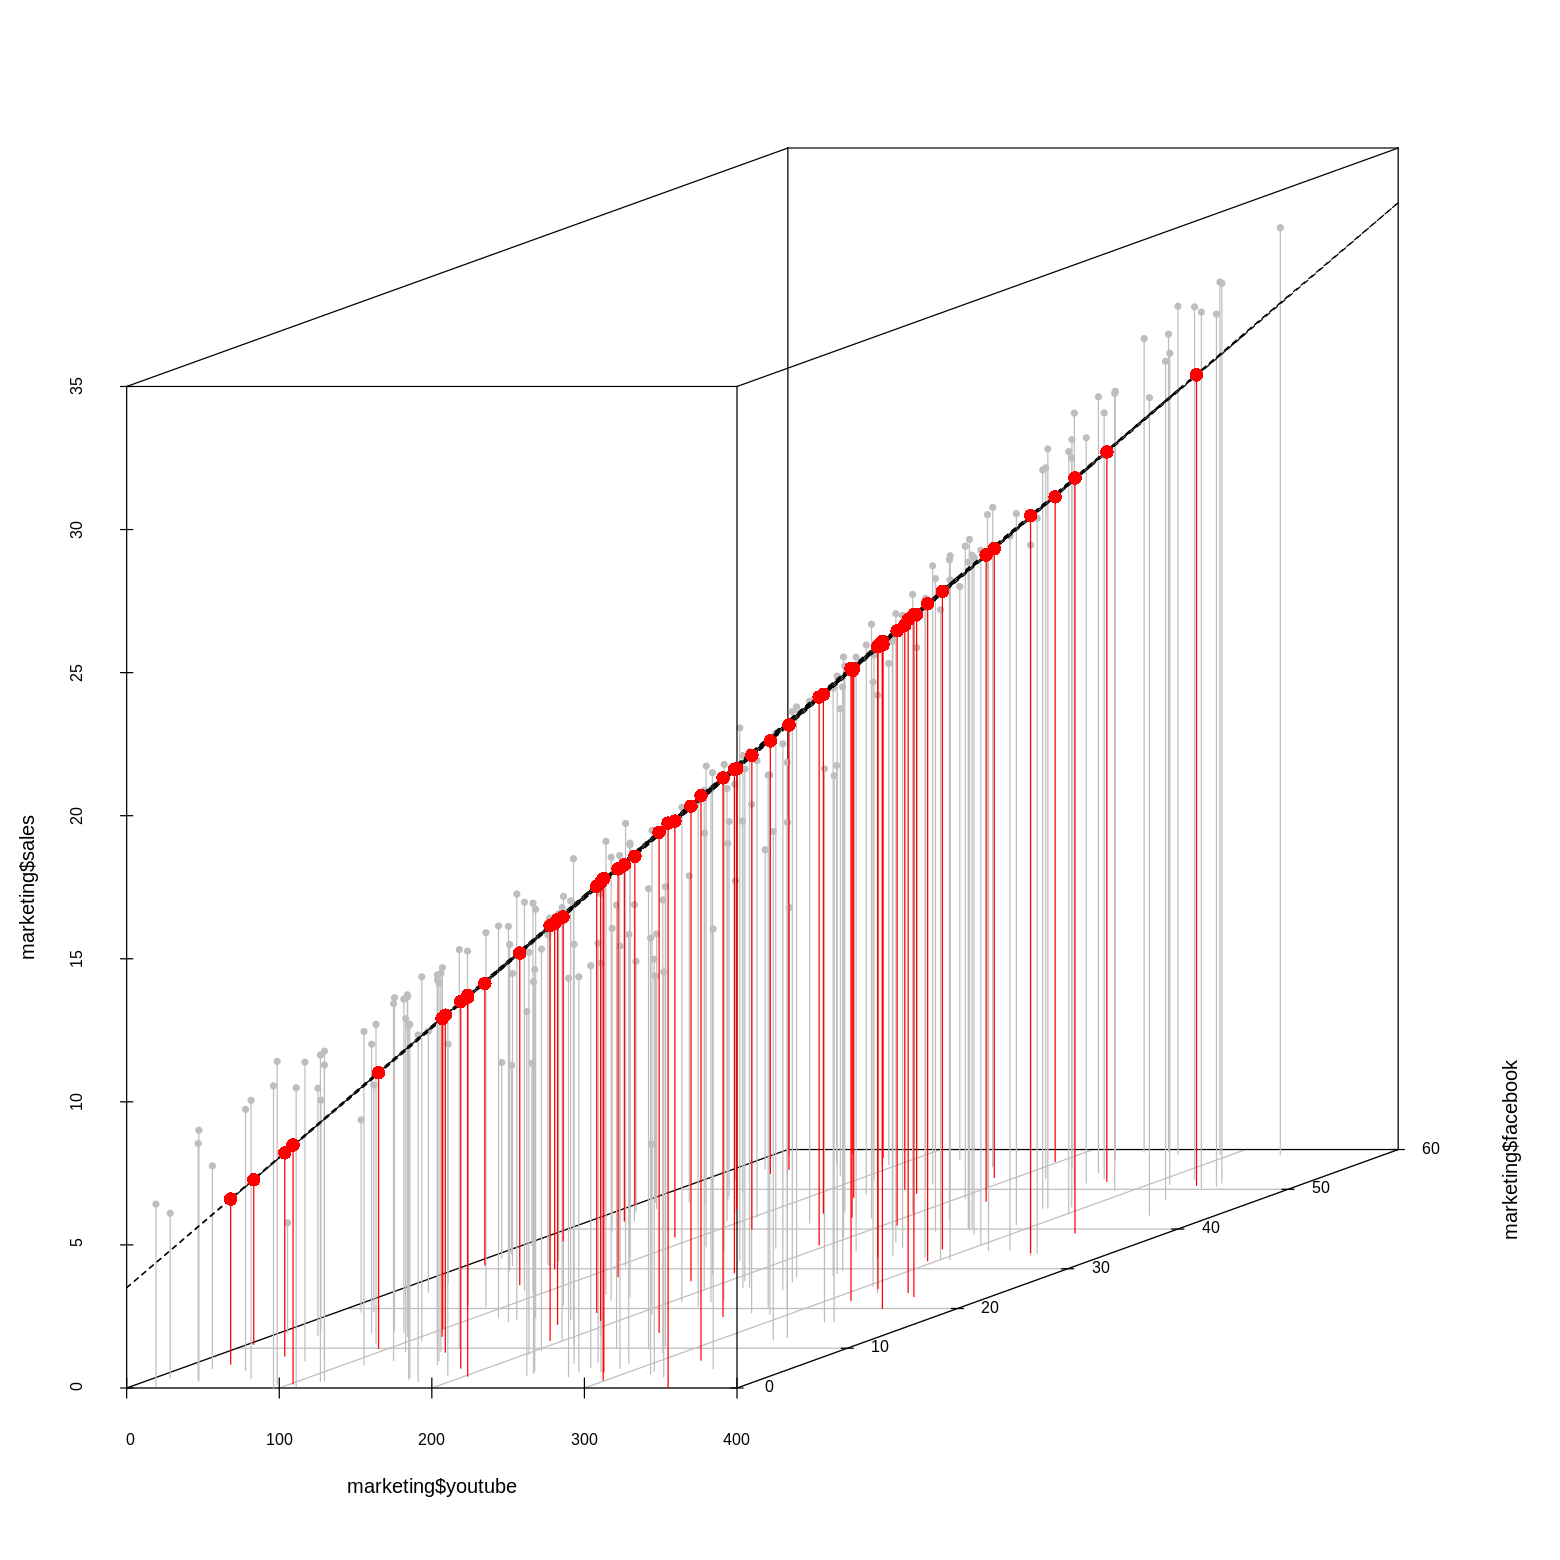

In [ ]:
s <- scatterplot3d(marketing$youtube, marketing$facebook, marketing$sales, pch = 20, type = 'h', angle = 25, color = "grey")
s$plane3d(model_2)
s$points3d(new_data$youtube, new_data$facebook, new_data$sales_predict, col = "red", type = "h", pch = 16, cex = 1.5)

- - -

#### **B. 예제 2**

https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=dateDown&view=table

In [ ]:
library(data.table)
library(tidyverse)

Sys.setlocale('LC_ALL','C') # 이부분 무시해도 됨.
DF <- fread("ftp://210.115.229.94/2020_datascience/BikeSeoul/SeoulBikeData.csv", sep = ",", stringsAsFactors = F) %>%
 as_tibble()

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [ ]:
DF %>% show()

# A tibble: 8,760 x 14
   Date  `Rented Bike Co~  Hour `Temperature(\2~ `Humidity(%)` `Wind speed (m/~
   <chr>            <int> <int>            <dbl>         <int>            <dbl>
 1 01/1~              254     0             -5.2            37              2.2
 2 01/1~              204     1             -5.5            38              0.8
 3 01/1~              173     2             -6              39              1  
 4 01/1~              107     3             -6.2            40              0.9
 5 01/1~               78     4             -6              36              2.3
 6 01/1~              100     5             -6.4            37              1.5
 7 01/1~              181     6             -6.6            35              1.3
 8 01/1~              460     7             -7.4            38              0.9
 9 01/1~              930     8             -7.6            37              1.1
10 01/1~              490     9             -6.5            27              0.5
# ... with 8,750 

In [ ]:
DF %>% str()

tibble [8,760 x 14] (S3: tbl_df/tbl/data.frame)
 $ Date                        : chr [1:8760] "01/12/2017" "01/12/2017" "01/12/2017" "01/12/2017" ...
 $ Rented Bike Count           : int [1:8760] 254 204 173 107 78 100 181 460 930 490 ...
 $ Hour                        : int [1:8760] 0 1 2 3 4 5 6 7 8 9 ...
 $ Temperature(<b0>C)          : num [1:8760] -5.2 -5.5 -6 -6.2 -6 -6.4 -6.6 -7.4 -7.6 -6.5 ...
 $ Humidity(%)                 : int [1:8760] 37 38 39 40 36 37 35 38 37 27 ...
 $ Wind speed (m/s)            : num [1:8760] 2.2 0.8 1 0.9 2.3 1.5 1.3 0.9 1.1 0.5 ...
 $ Visibility (10m)            : int [1:8760] 2000 2000 2000 2000 2000 2000 2000 2000 2000 1928 ...
 $ Dew point temperature(<b0>C): num [1:8760] -17.6 -17.6 -17.7 -17.6 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 ...
 $ Solar Radiation (MJ/m2)     : num [1:8760] 0 0 0 0 0 0 0 0 0.01 0.23 ...
 $ Rainfall(mm)                : num [1:8760] 0 0 0 0 0 0 0 0 0 0 ...
 $ Snowfall (cm)               : num [1:8760] 0 0 0 0 0 0 0 0 0 0 ...
 

* 열(column) 이름 변경

In [ ]:
#https://datascience.stackexchange.com/questions/8922/removing-strings-after-a-certain-character-in-a-given-text
#https://stackoverflow.com/questions/5992082/how-to-remove-all-whitespace-from-a-string

colnames(DF) <- colnames(DF) %>% lapply(X = ., FUN = function(value){
  stringr::str_remove(string = value, pattern = "\\(.*") %>%
  stringr::str_replace_all(string = ., pattern = "[[:space:]]", replace = "_")
}) %>% unlist()

DF %>% str()

tibble [8,760 x 14] (S3: tbl_df/tbl/data.frame)
 $ Date                 : chr [1:8760] "01/12/2017" "01/12/2017" "01/12/2017" "01/12/2017" ...
 $ Rented_Bike_Count    : int [1:8760] 254 204 173 107 78 100 181 460 930 490 ...
 $ Hour                 : int [1:8760] 0 1 2 3 4 5 6 7 8 9 ...
 $ Temperature          : num [1:8760] -5.2 -5.5 -6 -6.2 -6 -6.4 -6.6 -7.4 -7.6 -6.5 ...
 $ Humidity             : int [1:8760] 37 38 39 40 36 37 35 38 37 27 ...
 $ Wind_speed_          : num [1:8760] 2.2 0.8 1 0.9 2.3 1.5 1.3 0.9 1.1 0.5 ...
 $ Visibility_          : int [1:8760] 2000 2000 2000 2000 2000 2000 2000 2000 2000 1928 ...
 $ Dew_point_temperature: num [1:8760] -17.6 -17.6 -17.7 -17.6 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 ...
 $ Solar_Radiation_     : num [1:8760] 0 0 0 0 0 0 0 0 0.01 0.23 ...
 $ Rainfall             : num [1:8760] 0 0 0 0 0 0 0 0 0 0 ...
 $ Snowfall_            : num [1:8760] 0 0 0 0 0 0 0 0 0 0 ...
 $ Seasons              : chr [1:8760] "Winter" "Winter" "Winter" "Winter" ...

In [ ]:
DF %>% summary()

     Date           Rented_Bike_Count      Hour        Temperature    
 Length:8760        Min.   :   0.0    Min.   : 0.00   Min.   :-17.80  
 Class :character   1st Qu.: 191.0    1st Qu.: 5.75   1st Qu.:  3.50  
 Mode  :character   Median : 504.5    Median :11.50   Median : 13.70  
                    Mean   : 704.6    Mean   :11.50   Mean   : 12.88  
                    3rd Qu.:1065.2    3rd Qu.:17.25   3rd Qu.: 22.50  
                    Max.   :3556.0    Max.   :23.00   Max.   : 39.40  
    Humidity      Wind_speed_     Visibility_   Dew_point_temperature
 Min.   : 0.00   Min.   :0.000   Min.   :  27   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 940   1st Qu.: -4.700      
 Median :57.00   Median :1.500   Median :1698   Median :  5.100      
 Mean   :58.23   Mean   :1.725   Mean   :1437   Mean   :  4.074      
 3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 14.800      
 Max.   :98.00   Max.   :7.400   Max.   :2000   Max.   : 27.200      
 Solar_Radiat

* 문자형 데이터를 범주형 데이터로 변환

In [ ]:
DF %>% boxplot()

ERROR: ignored

In [ ]:
DF <- DF %>% mutate_if(is.character, factor)
str(DF)

DF %>% boxplot(las=2)
DF %>% boxplot(plot = F) %>% str()

ERROR: ignored

In [ ]:
# GGally의 ggpairs를 이용한 산점도 및 상관관계 확인
install.packages("GGally")
DF %>% select_at(-1) %>% GGally::ggpairs()

* train / test 분리

In [ ]:
install.packages(c("caTools", "caret"))

In [ ]:
library(caret)
library(caTools)

In [ ]:
# caret을 이용한 train / test data 분리
?createDataPartition
trainIndex <- caret::createDataPartition(1:nrow(DF), p = 0.80, list = F)
head(trainIndex)

In [ ]:
DF_train <- DF[trainIndex, ] # 0.8
DF_test <- DF[-trainIndex, ] # 0.2

DF %>% nrow()
DF_train %>% show()
DF_test %>% show()

In [ ]:
# caTools 이용한 train / test data 분리
?sample.split
trainIndex <- caTools::sample.split(1:nrow(DF), SplitRatio = 0.80)
trainIndex

In [ ]:
DF_train <- filter(DF, trainIndex == T)
DF_test <- filter(DF, trainIndex == F)

DF_train %>% show()
DF_test %>% show()

* **회귀식 추정**

In [ ]:
str(DF_train)

In [ ]:
summary(lm(Rented_Bike_Count  ~ Seasons + Holiday, data = DF_train))
model.matrix(lm(Rented_Bike_Count  ~ Seasons + Holiday, data = DF_train)) %>% as_tibble() %>% show()

* Date(날짜)를 제외한 모든 설명변수를 이용한 회귀분석

In [ ]:
# Hour --> 오전(0 ~ 12), 오후(13 ~24)으로 그룹화(0 == 오전, 1 == 오후)
DF_train <- DF_train %>% mutate(Hour = ifelse(Hour <= 12, 0, 1)) %>%
 mutate(Hour = factor(Hour))
DF_test <- DF_test %>% mutate(Hour = ifelse(Hour <= 12, 0, 1)) %>%
 mutate(Hour = factor(Hour))

In [ ]:
DF_train %>% select(Hour) %>% show()

In [ ]:
model <- lm(Rented_Bike_Count ~ . -Date , data = DF_train)
summary(model)

In [ ]:
plotRelWeights(model)

* step을 이용한 방법

In [ ]:
model_2 <- step(model, direction = "backward")
summary(model_2)

In [ ]:
plotRelWeights(model_2)

* Wind_speed_ 제거

In [ ]:
model_3 <- update(model_2, .~. -Wind_speed_)
summary(model_3)
plotRelWeights(model_3)

* Observed/fitted values and residuals

In [ ]:
install.packages("moderndive")

In [ ]:
set.seed(30)
moderndive::get_regression_points(model_3) %>%
 sample_n(size = 40) %>% select(ID, Rented_Bike_Count, Rented_Bike_Count_hat, residual)

* 사용되는 설명변수의 수가 많을 수록 결정계수는 상승한다..!

In [ ]:
summary(lm(Rented_Bike_Count ~ Dew_point_temperature + Hour + Humidity, data = DF_train))

* test를 이용한 예측

In [ ]:
predict(model_3, DF_test)

* Observed/fitted values and residuals

In [ ]:
set.seed(50)
DF_test %>% select(Rented_Bike_Count) %>% 
 bind_cols(., tibble(Rented_Bike_Count_test_hat = predict(model_3, DF_test))) %>%
 mutate(residual = Rented_Bike_Count - Rented_Bike_Count_test_hat) %>%
 sample_n(size = 50)

- - -

## **C. 실습 과제 <9주차 과제 - 100점>**

### **(1) 각각의 문제 바로 아래에 답을 작성 후, Big_data_Lab9.ipynb 파일을 한림SmartLEAD에 제출할 것**
### **(2) 제출 데드라인 : 2020.10.26(월요일) ~ 2020.11.1(일요일) 23:59 까지**
### **(3) 부정행위 적발 시, 원본(보여준 사람)과 복사본(베낀 사람) 모두 0점 처리**
### **(4) !!해당 문제의 코드와 출력 결과를 반드시 기록할 것(둘 중 하나라도 없으면 해당 문제 0점처리)!!**


- - -


### **1. 다음의 [링크(클릭)](https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table)에서 Default Task가 ``	Regression ``인 데이터를 적절히 선택하여, ``단순회귀분석(Simple Linear Regression)``과 ``다중회귀분석(Multiple Linear Regression)``을 실습자료의 ``예제1과 예제2 유사한 방식``으로 진행하시오.**

``* 단순회귀분석 50점, 다중회귀분석 50점``

<br>

#### **다음의 조건을 만족해야 함**

```
## 조건
1. 선택한 데이터의 Attribute(속성 또는 열)에 대한 설명
2. scatter plot(산점도), boxplot 등 시각화하여 각 Attribute의 값에 대한 설명
3. 적절한 반응변수와 설명변수의 섫정
4. Train / Test set 분리 후 회귀식 추정
5. 회귀분석 결과 해석
6. Feature selection(변수 선택)
7. Test set을 이용한 Predict(예측)
```



### **1-1. 단순회귀분석 (50점)**

In [275]:
install.packages(c("tidyverse", "data.table", "scatterplot3d", "plotly","PerformanceAnalytics"))
library(data.table)
library(tidyverse)

DF <- fread("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",stringsAsFactors = F) %>%
 as_tibble()

DF1 <- tibble(alcohol = DF$alcohol, "quality" = DF$quality)
DF1 %>% show()

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# A tibble: 1,599 x 2
   alcohol quality
     <dbl>   <int>
 1     9.4       5
 2     9.8       5
 3     9.8       5
 4     9.8       6
 5     9.4       5
 6     9.4       5
 7     9.4       5
 8    10         7
 9     9.5       7
10    10.5       5
# … with 1,589 more rows


* 선택한 데이터의 Attribute(속성 또는 열)에 대한 설명

```
alcohol              알코올
quality              품질 (0 ~ 10 점)

```

* scatter plot(산점도), boxplot 등 시각화하여 각 Attribute의 값에 대한 설명

In [276]:
# "scatterplot3d", "plotly","PerformanceAnalytics", "boxplot" 활용

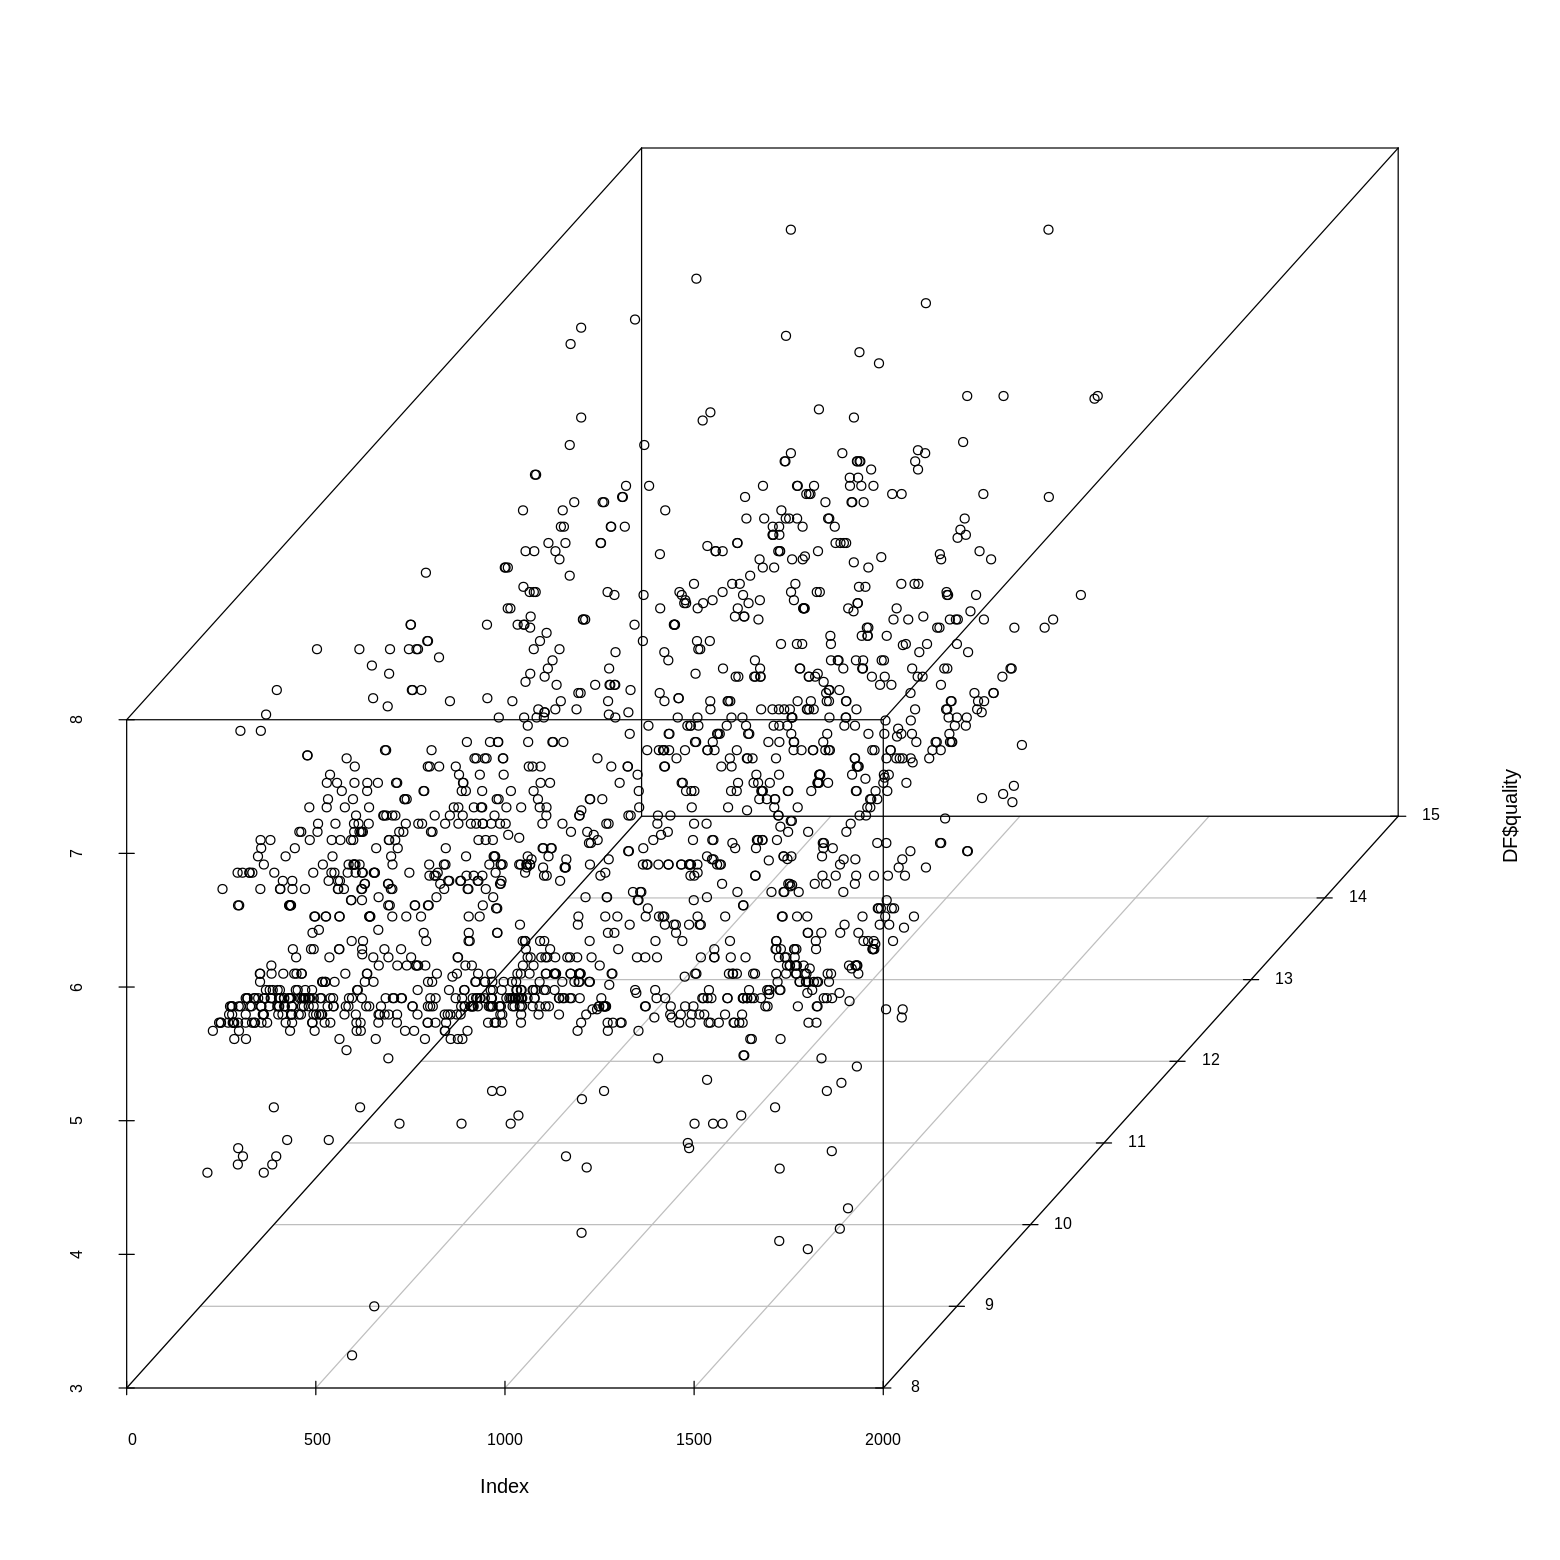

In [277]:
library(scatterplot3d)
scatterplot3d(DF$alcohol, DF$quality, angle = 55)

In [278]:
library(plotly)
fig <- plot_ly(DF1, x = ~DF1$alcohol, y = DF1$quality, color = ~DF1$quality)
fig <- fig %>% add_markers()
fig <- fig %>% layout(scene = list(xaxis = list(title = "alcohol"),
                                   yaxis = list(title = "quality")))
htmlwidgets::saveWidget(fig, file = "3d_scatter1.html")

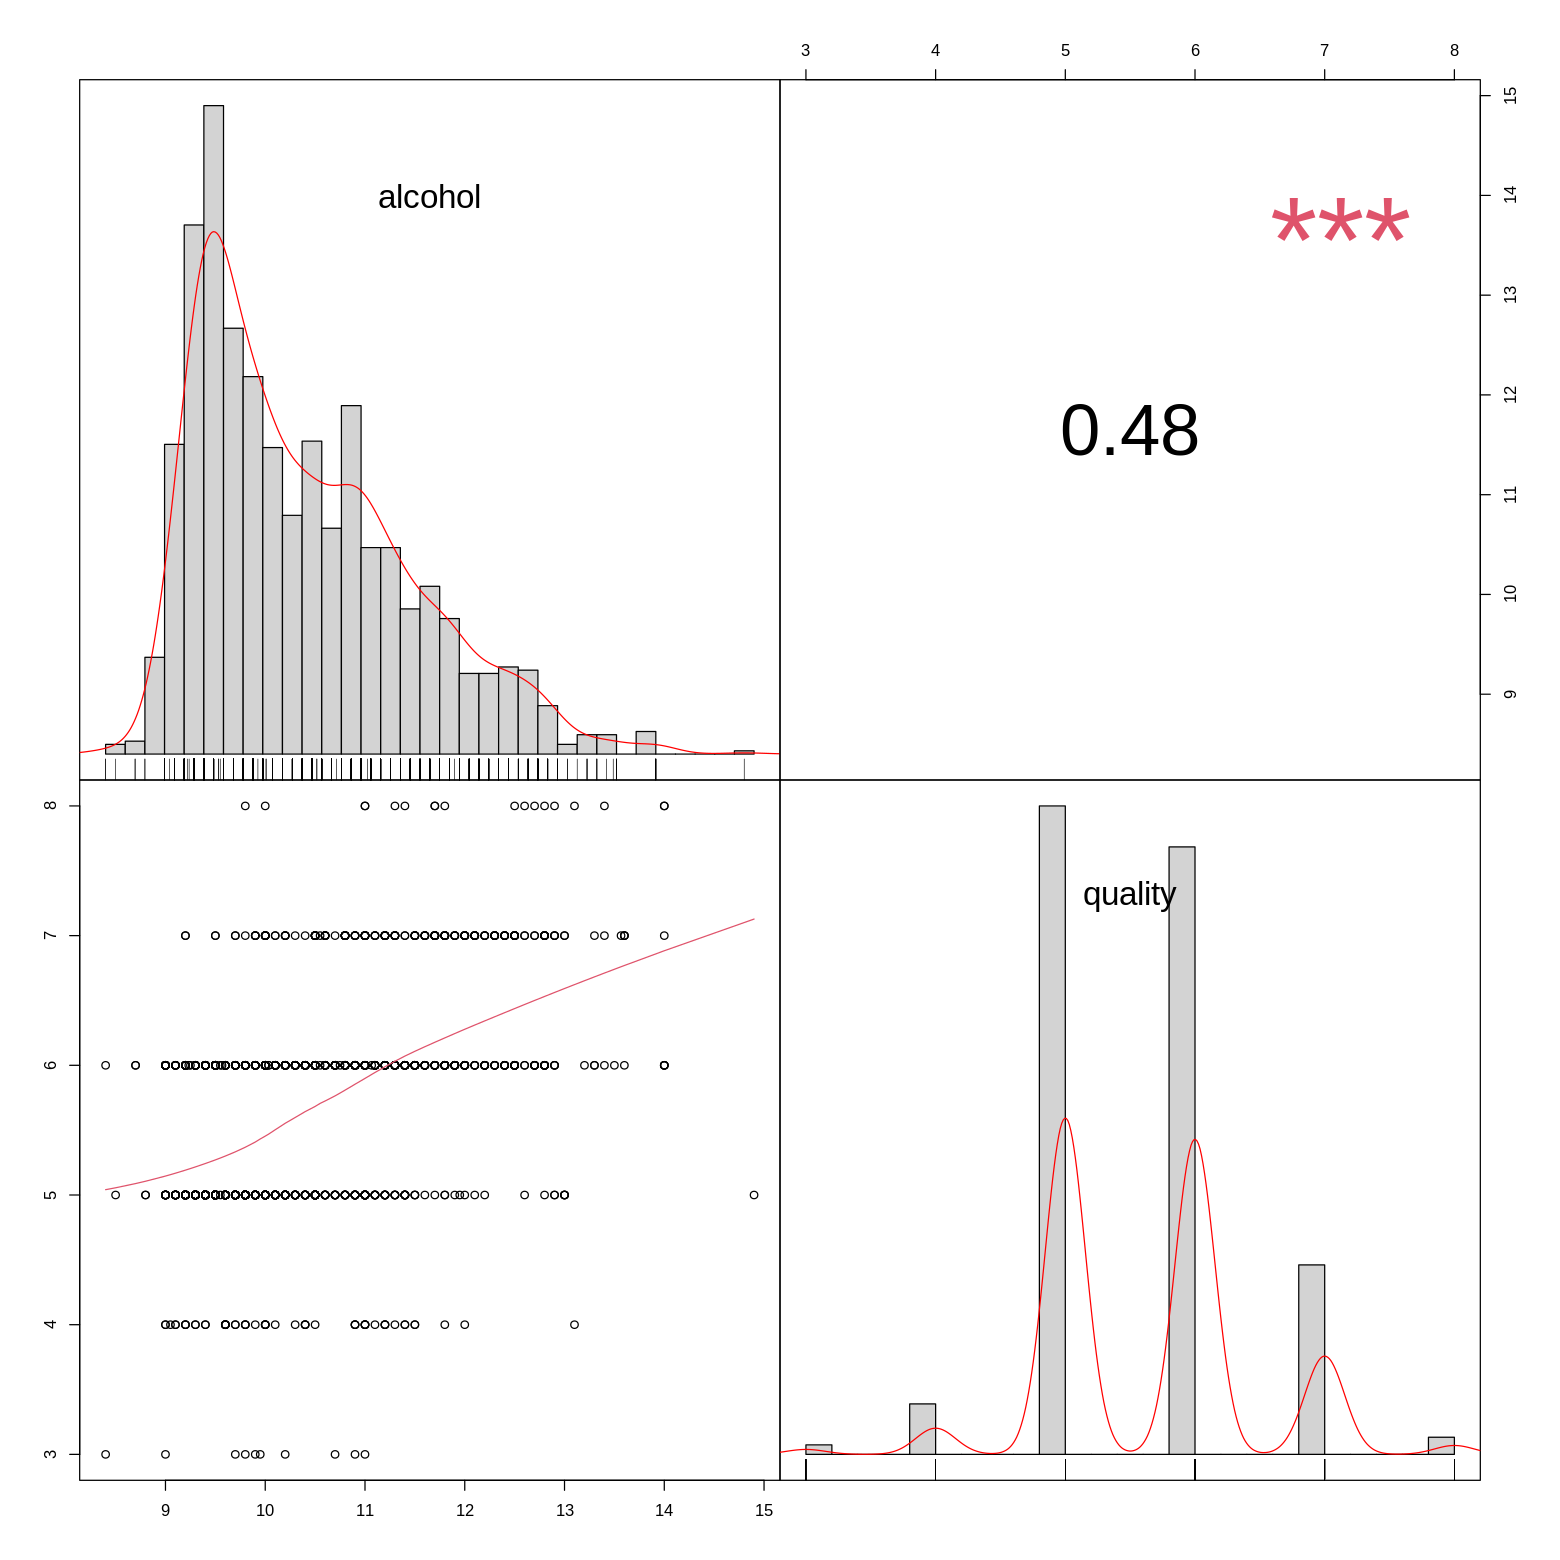

In [279]:
library(PerformanceAnalytics)
chart.Correlation(DF1, histogram=TRUE, pch=19)

List of 6
 $ stats: num [1:5, 1:2] 8.4 9.5 10.2 11.1 13.5 4 5 6 6 7
 $ n    : num [1:2] 1599 1599
 $ conf : num [1:2, 1:2] 10.14 10.26 5.96 6.04
 $ out  : num [1:41] 14 14 14 14 14.9 14 13.6 13.6 13.6 14 ...
 $ group: num [1:41] 1 1 1 1 1 1 1 1 1 1 ...
 $ names: chr [1:2] "alcohol" "quality"


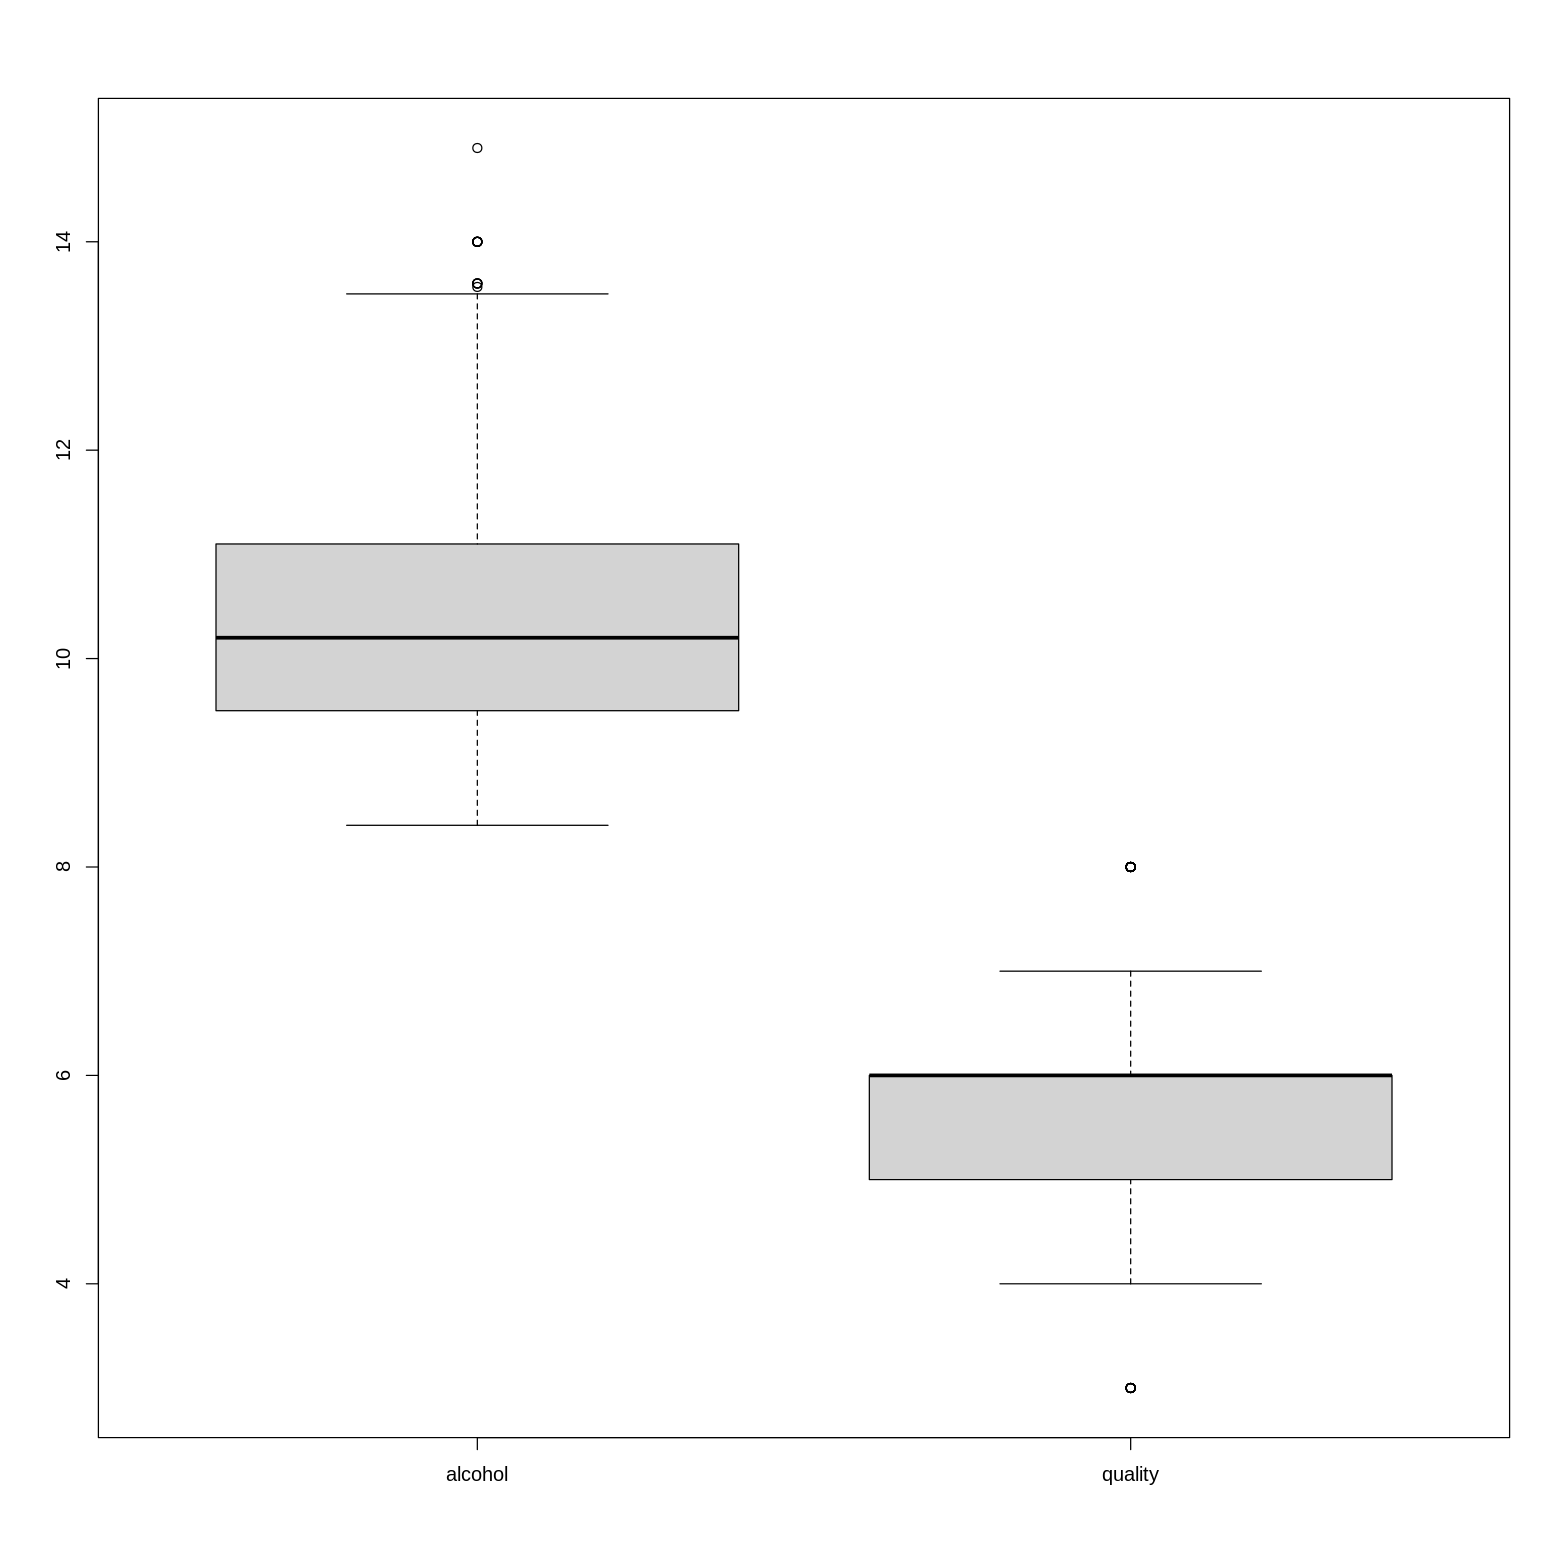

In [280]:
boxplot(DF1)
str(boxplot(DF1, plot = F))

* 적절한 반응변수와 설명변수의 설정

```
반응변수 : quality
설명변수 : alcohol
설정한 이유 : 이 데이터가 와인의 품질에 영향을 미치는 여러 요소를 가진 데이터이기 때문에, quality를 반응변수로 설정하고, 설명변수를 alcohol로 설정함
```

* Train / Test set 분리 후 회귀식 추정

In [281]:
# "caTools::sample.split", "caret:"sample.split", "lm" 활용
install.packages(c("caTools", "caret"))
library(caret)
library(caTools)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [284]:
?createDataPartition
trainIndex <- caret::createDataPartition(1:nrow(DF1), p = 0.80, list = F)
head(trainIndex)

DF1_train <- DF1[trainIndex, ] # 0.8
DF1_test <- DF1[-trainIndex, ] # 0.2

DF1_train.lm <- lm(quality ~ alcohol, data = DF1_train)
summary(DF1_train.lm)

Resample1
1
2
4
5
7
8



Call:
lm(formula = quality ~ alcohol, data = DF1_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8387 -0.4123 -0.1636  0.5166  2.5877 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.93054    0.19288   10.01   <2e-16 ***
alcohol      0.35528    0.01842   19.28   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7077 on 1278 degrees of freedom
Multiple R-squared:  0.2254,	Adjusted R-squared:  0.2248 
F-statistic: 371.9 on 1 and 1278 DF,  p-value: < 2.2e-16


In [285]:
?sample.split
trainIndex <- caTools::sample.split(1:nrow(DF1), SplitRatio = 0.80)

DF1_train <- filter(DF1, trainIndex == T)
DF1_test <- filter(DF1, trainIndex == F)

DF1_train.lm <- lm(quality ~ alcohol, data = DF1_train)
summary(DF1_train.lm)


Call:
lm(formula = quality ~ alcohol, data = DF1_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8379 -0.3977 -0.1775  0.5290  2.6023 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.80241    0.19310   9.334   <2e-16 ***
alcohol      0.36686    0.01844  19.897   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7026 on 1277 degrees of freedom
Multiple R-squared:  0.2367,	Adjusted R-squared:  0.2361 
F-statistic: 395.9 on 1 and 1277 DF,  p-value: < 2.2e-16


In [286]:
model1 <- lm(quality ~ alcohol, data = DF1)
model1


Call:
lm(formula = quality ~ alcohol, data = DF1)

Coefficients:
(Intercept)      alcohol  
     1.8750       0.3608  


* 회귀분석 결과 해석(이론 강의 참고)


In [287]:
# "summary", "plotRelWeights" 활용

In [288]:
summary(model1)


Call:
lm(formula = quality ~ alcohol, data = DF1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8442 -0.4112 -0.1690  0.5166  2.5888 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.87497    0.17471   10.73   <2e-16 ***
alcohol      0.36084    0.01668   21.64   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7104 on 1597 degrees of freedom
Multiple R-squared:  0.2267,	Adjusted R-squared:  0.2263 
F-statistic: 468.3 on 1 and 1597 DF,  p-value: < 2.2e-16


F-statistic의 p-value 값은 2.2e-16 으로 0.05보다 작기에 이 회귀식은 회귀분석 모델 전체에 대해 통계적으로 의미가 있다고 볼 수 있다

밑부분의 Adjusted R-squared의 값은 0.2267로, 22%만큼의 설명력을 가진다고 판단할 수 있다

In [289]:
factor2number=function(df){
    select=sapply(df,function(x) {is.factor(x)})
    if(sum(select)==1) df[[which(select)]]<-as.numeric(df[[which(select)]])
    else if(sum(select)>1) df[,select]<-lapply(df[,select],as.numeric)
    df
}

chr2factor=function(df){
    select=sapply(df,function(x) {is.character(x)})
    df[,select]<-lapply(df[,select],factor)
    df
}

relweights <- function(fit,plot=FALSE,...){
    df<-fit$model
    df1<-chr2factor(df)
    df2<-factor2number(df1)
    
    R <- cor(df2)
    nvar <- ncol(R)
    rxx <- R[2:nvar, 2:nvar]
    rxy <- R[2:nvar, 1]
    svd <- eigen(rxx)
    evec <- svd$vectors
    ev <- svd$values
    delta <- diag(sqrt(ev))
    lambda <- evec %*% delta %*% t(evec)
    lambdasq <- lambda ^ 2
    beta <- solve(lambda) %*% rxy
    rsquare <- colSums(beta ^ 2)
    rawwgt <- lambdasq %*% beta ^ 2
    import <- (rawwgt / rsquare) * 100
    import <- as.data.frame(import)
    row.names(import) <- names(fit$model[2:nvar])
    names(import) <- "Weights"
    import <- import[order(import),1, drop=FALSE]
    if(plot) {
        dotchart(import$Weights, labels=row.names(import),
                 xlab="% of R-Square", pch=19,
                 main="Relative Importance of Predictor Variables",
                 sub=paste("Total R-Square=", round(rsquare, digits=3)),
                 ...)
    }  
    attr(import,"R-square")<-round(rsquare, digits=3)
    return(import)
}

plotRelWeights=function(fit){
       data<-relweights(fit)
       data$Predictors<-rownames(data)
       p<-ggplot(data=data,aes(x=reorder(Predictors,Weights),y=Weights,fill=Predictors))+ 
           geom_bar(stat="identity",width=0.5)+
           ggtitle("Relative Importance of Predictor Variables")+
           ylab(paste0("% of R-square \n(Total R-Square=",attr(data,"R-square"),")"))+
           geom_text(aes(y=Weights-0.1,label=paste(round(Weights,1),"%")),hjust=1)+
           guides(fill=FALSE)+
           coord_flip()
       p
   }

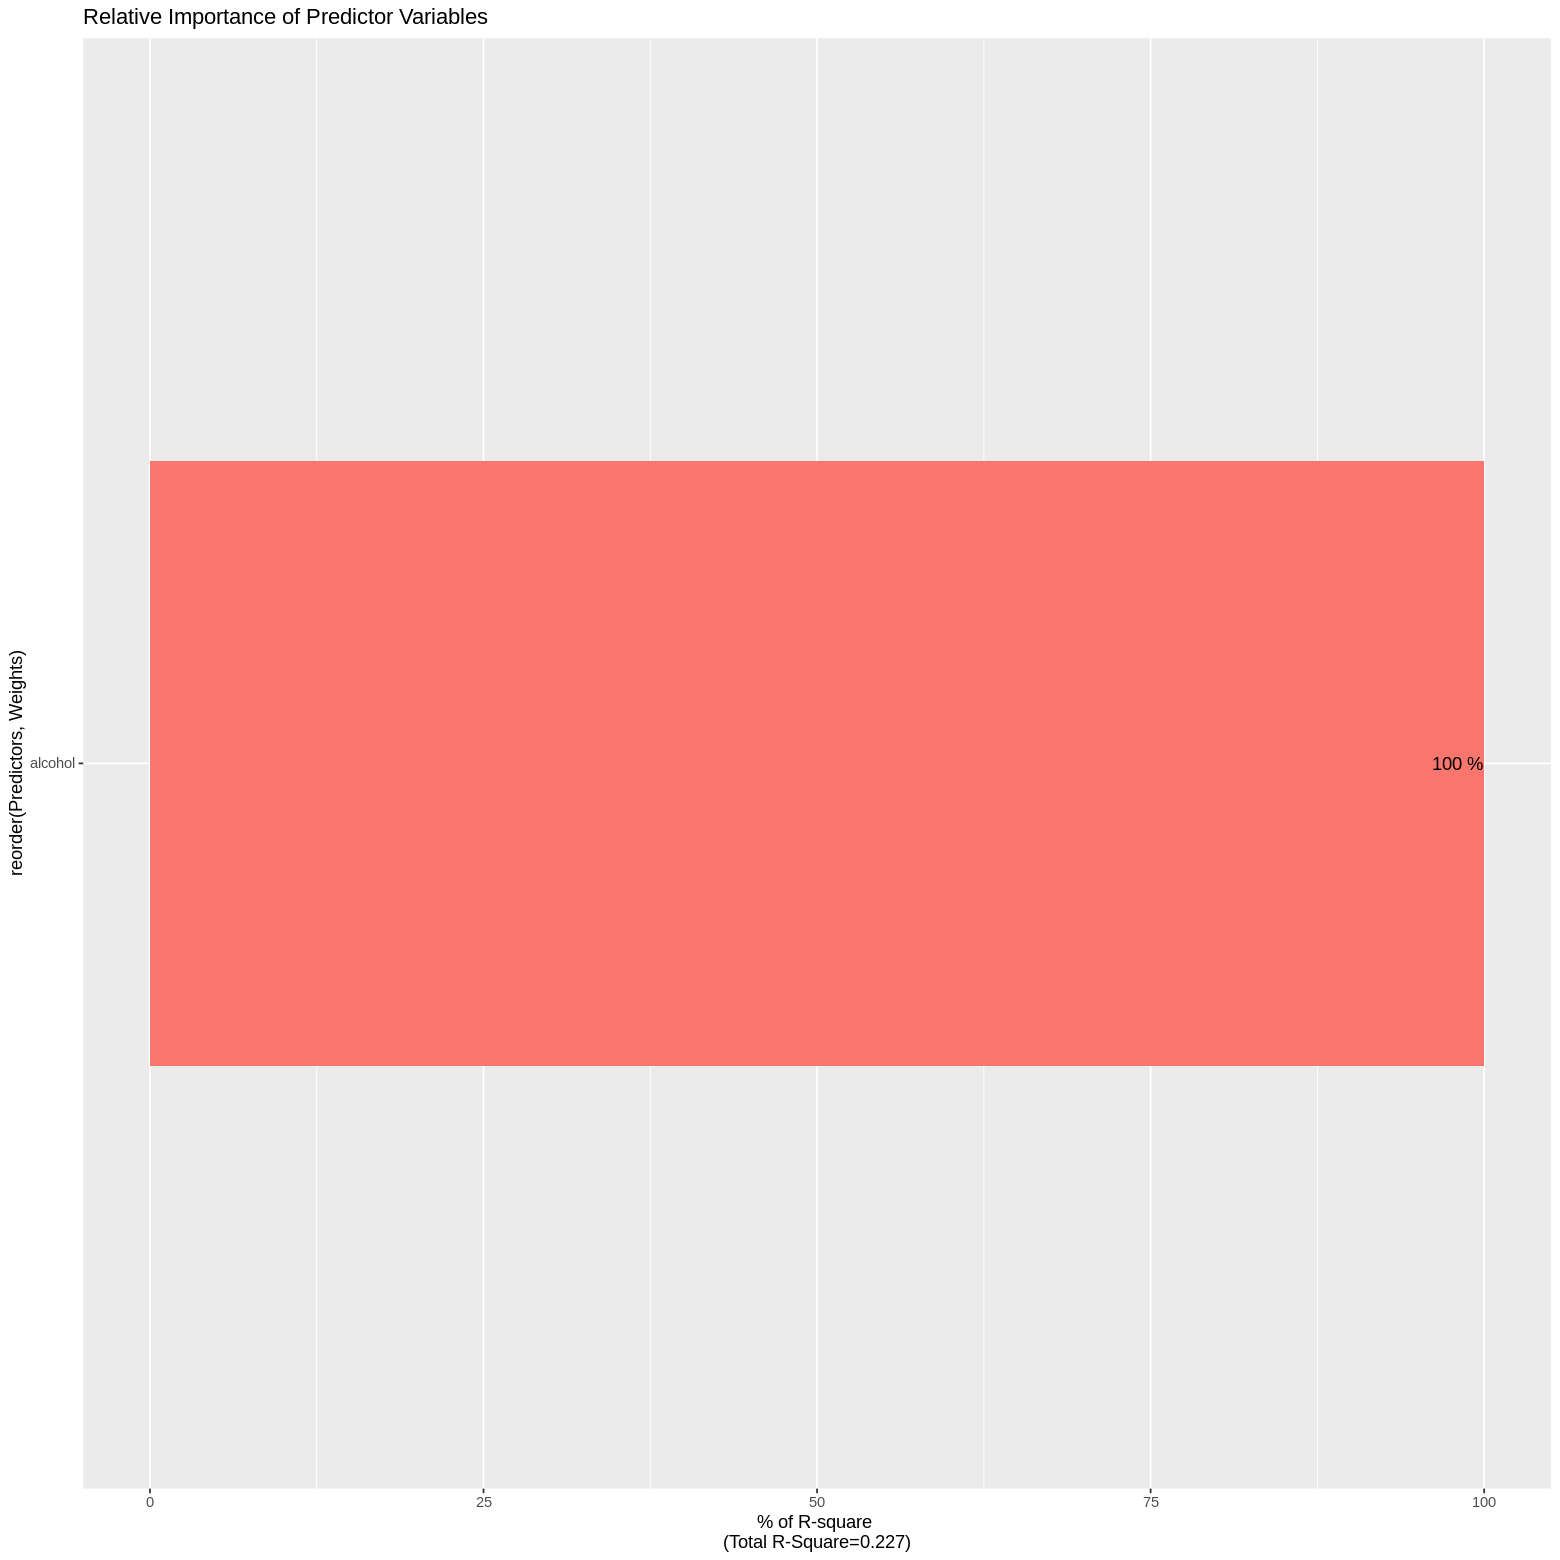

In [290]:
plotRelWeights(model1)

* Feature selection(변수 선택)

In [291]:
# "lm", "update", "step" 활용
model1_2 <- step(model1, direction = "backward")

Start:  AIC=-1091.65
quality ~ alcohol

          Df Sum of Sq     RSS     AIC
<none>                  805.87 -1091.7
- alcohol  1    236.29 1042.17  -682.5


* Test set을 이용한 Predict(예측)

In [292]:
# "predict" 활용
set.seed(51)
alcohol_r <- sample(DF1$alcohol, 60, replace = F)

new_data1 <- tibble(alcohol = alcohol_r)
new_data1 %>% show()

# A tibble: 60 x 1
   alcohol
     <dbl>
 1     9.5
 2    11.3
 3    10.8
 4     8.5
 5     9.5
 6    10.2
 7    12  
 8    13.3
 9     9.5
10    10.2
# … with 50 more rows


In [293]:
quality1_r <- predict(model1_2, new_data1)

new_data1 <- new_data1 %>% bind_cols(tibble(quality_predict = quality1_r))

new_data1 %>% show()

# A tibble: 60 x 2
   alcohol quality_predict
     <dbl>           <dbl>
 1     9.5            5.30
 2    11.3            5.95
 3    10.8            5.77
 4     8.5            4.94
 5     9.5            5.30
 6    10.2            5.56
 7    12              6.21
 8    13.3            6.67
 9     9.5            5.30
10    10.2            5.56
# … with 50 more rows


### **1-2. 다중회귀분석 (50점)**

In [294]:
DF2 <- tibble("citric_acid" = DF$`citric acid`, "residual_sugar" = DF$`residual sugar`, alcohol = DF$alcohol, "quality" = DF$quality)
DF2 %>% show()

# A tibble: 1,599 x 4
   citric_acid residual_sugar alcohol quality
         <dbl>          <dbl>   <dbl>   <int>
 1        0               1.9     9.4       5
 2        0               2.6     9.8       5
 3        0.04            2.3     9.8       5
 4        0.56            1.9     9.8       6
 5        0               1.9     9.4       5
 6        0               1.8     9.4       5
 7        0.06            1.6     9.4       5
 8        0               1.2    10         7
 9        0.02            2       9.5       7
10        0.36            6.1    10.5       5
# … with 1,589 more rows


* 선택한 데이터의 Attribute(속성 또는 열)에 대한 설명
```
citric acid          구연산
residual sugar       잔류 설탕
alcohol              알코올
quality              품질 (0 ~ 10 점)
```

* scatter plot(산점도), boxplot 등 시각화하여 각 Attribute의 값에 대한 설명

In [295]:
# "scatterplot3d", "plotly","PerformanceAnalytics", "boxplot" 활용

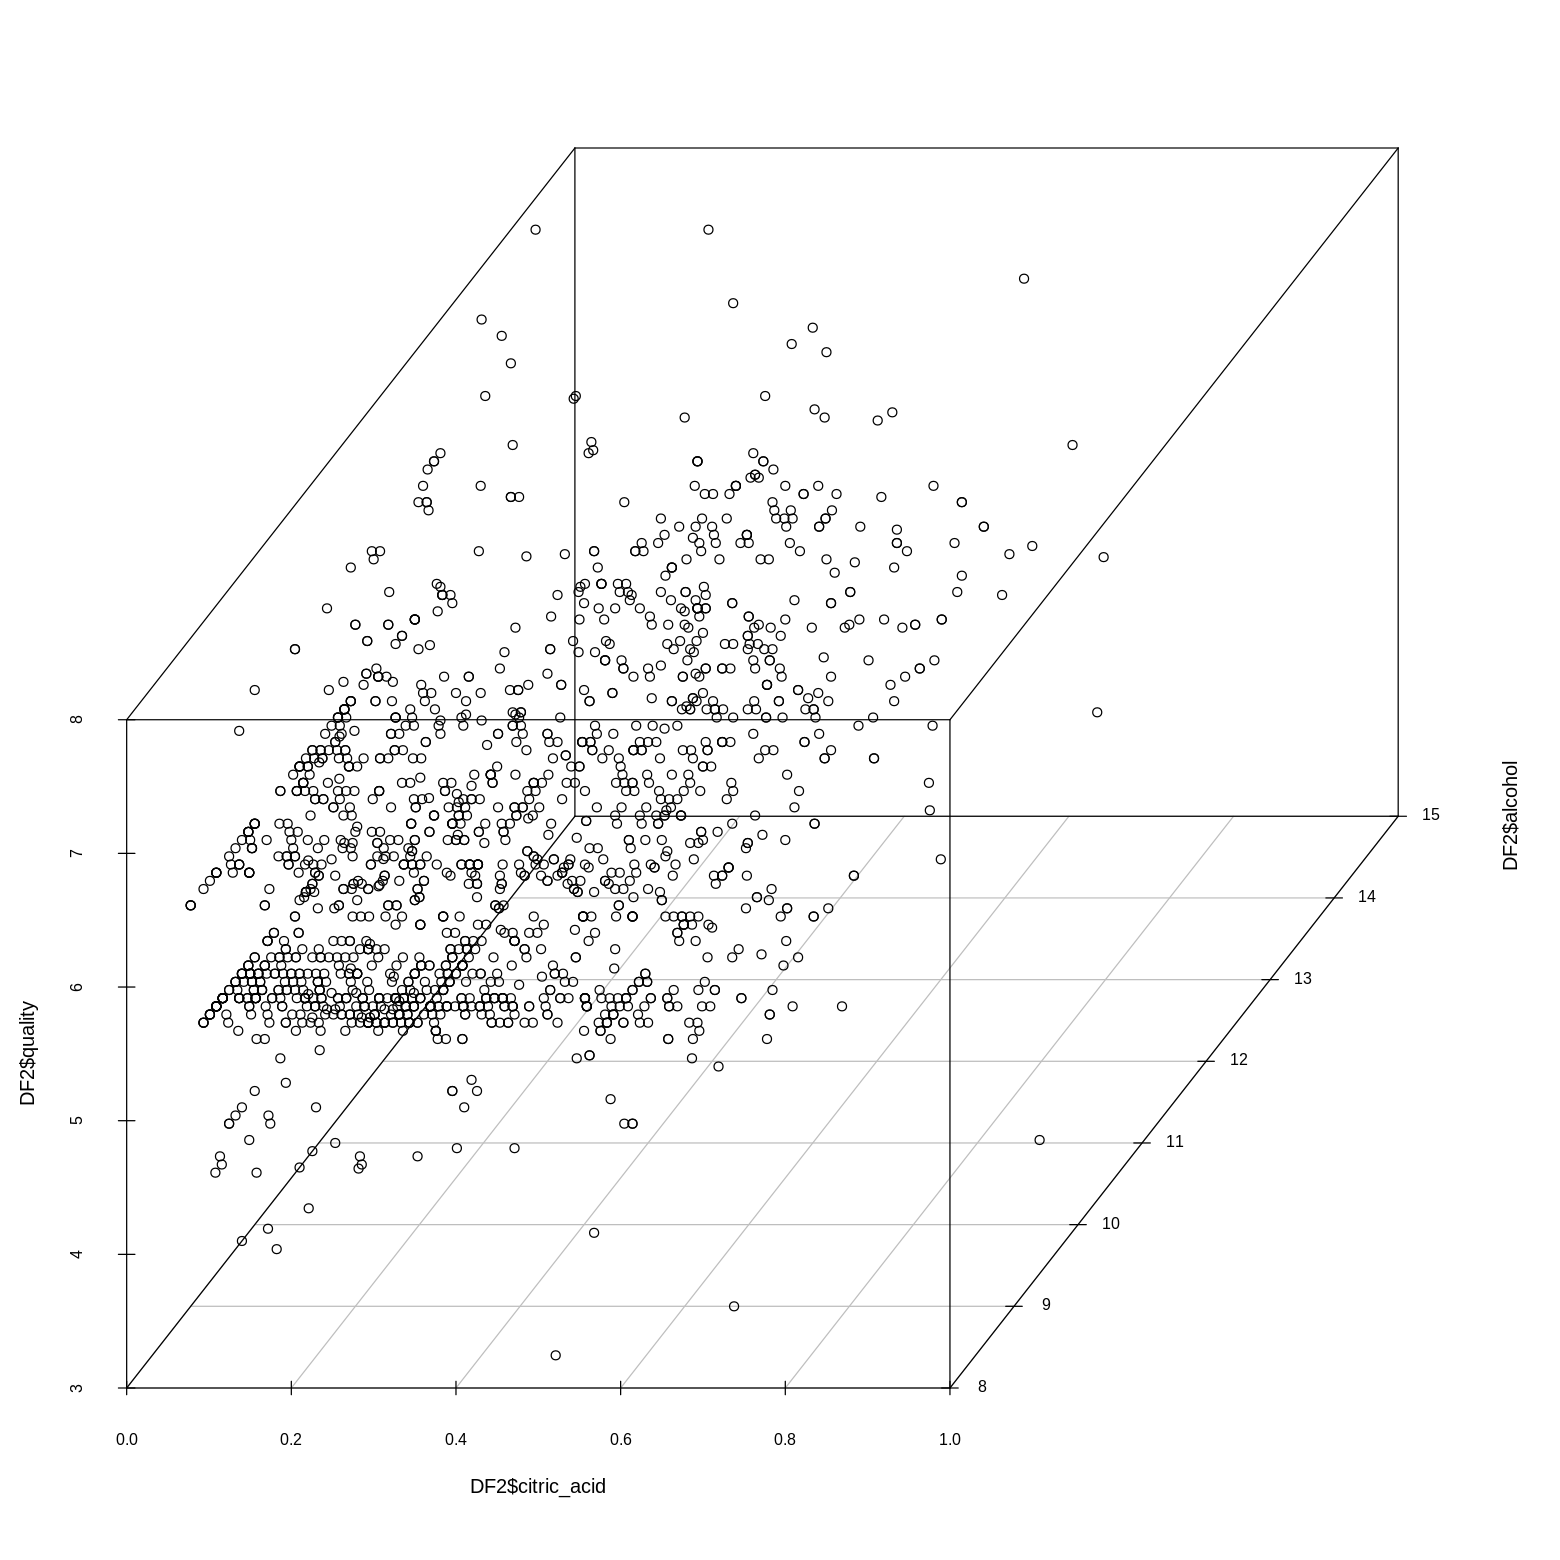

In [296]:
scatterplot3d(DF2$citric_acid, DF2$alcohol, DF2$quality, angle = 55)

In [297]:
fig <- plot_ly(DF2, x = ~DF2$citric_acid, y = ~DF2$alcohol, z = DF2$quality, color = ~DF2$quality)
fig <- fig %>% add_markers()
fig <- fig %>% layout(scene = list(xaxis = list(title = "citiric acid"),
                                   yaxis = list(title = "alcohol"),
                                   zaxis = list(title = "quality")))
htmlwidgets::saveWidget(fig, file = "3d_scatter2.html")

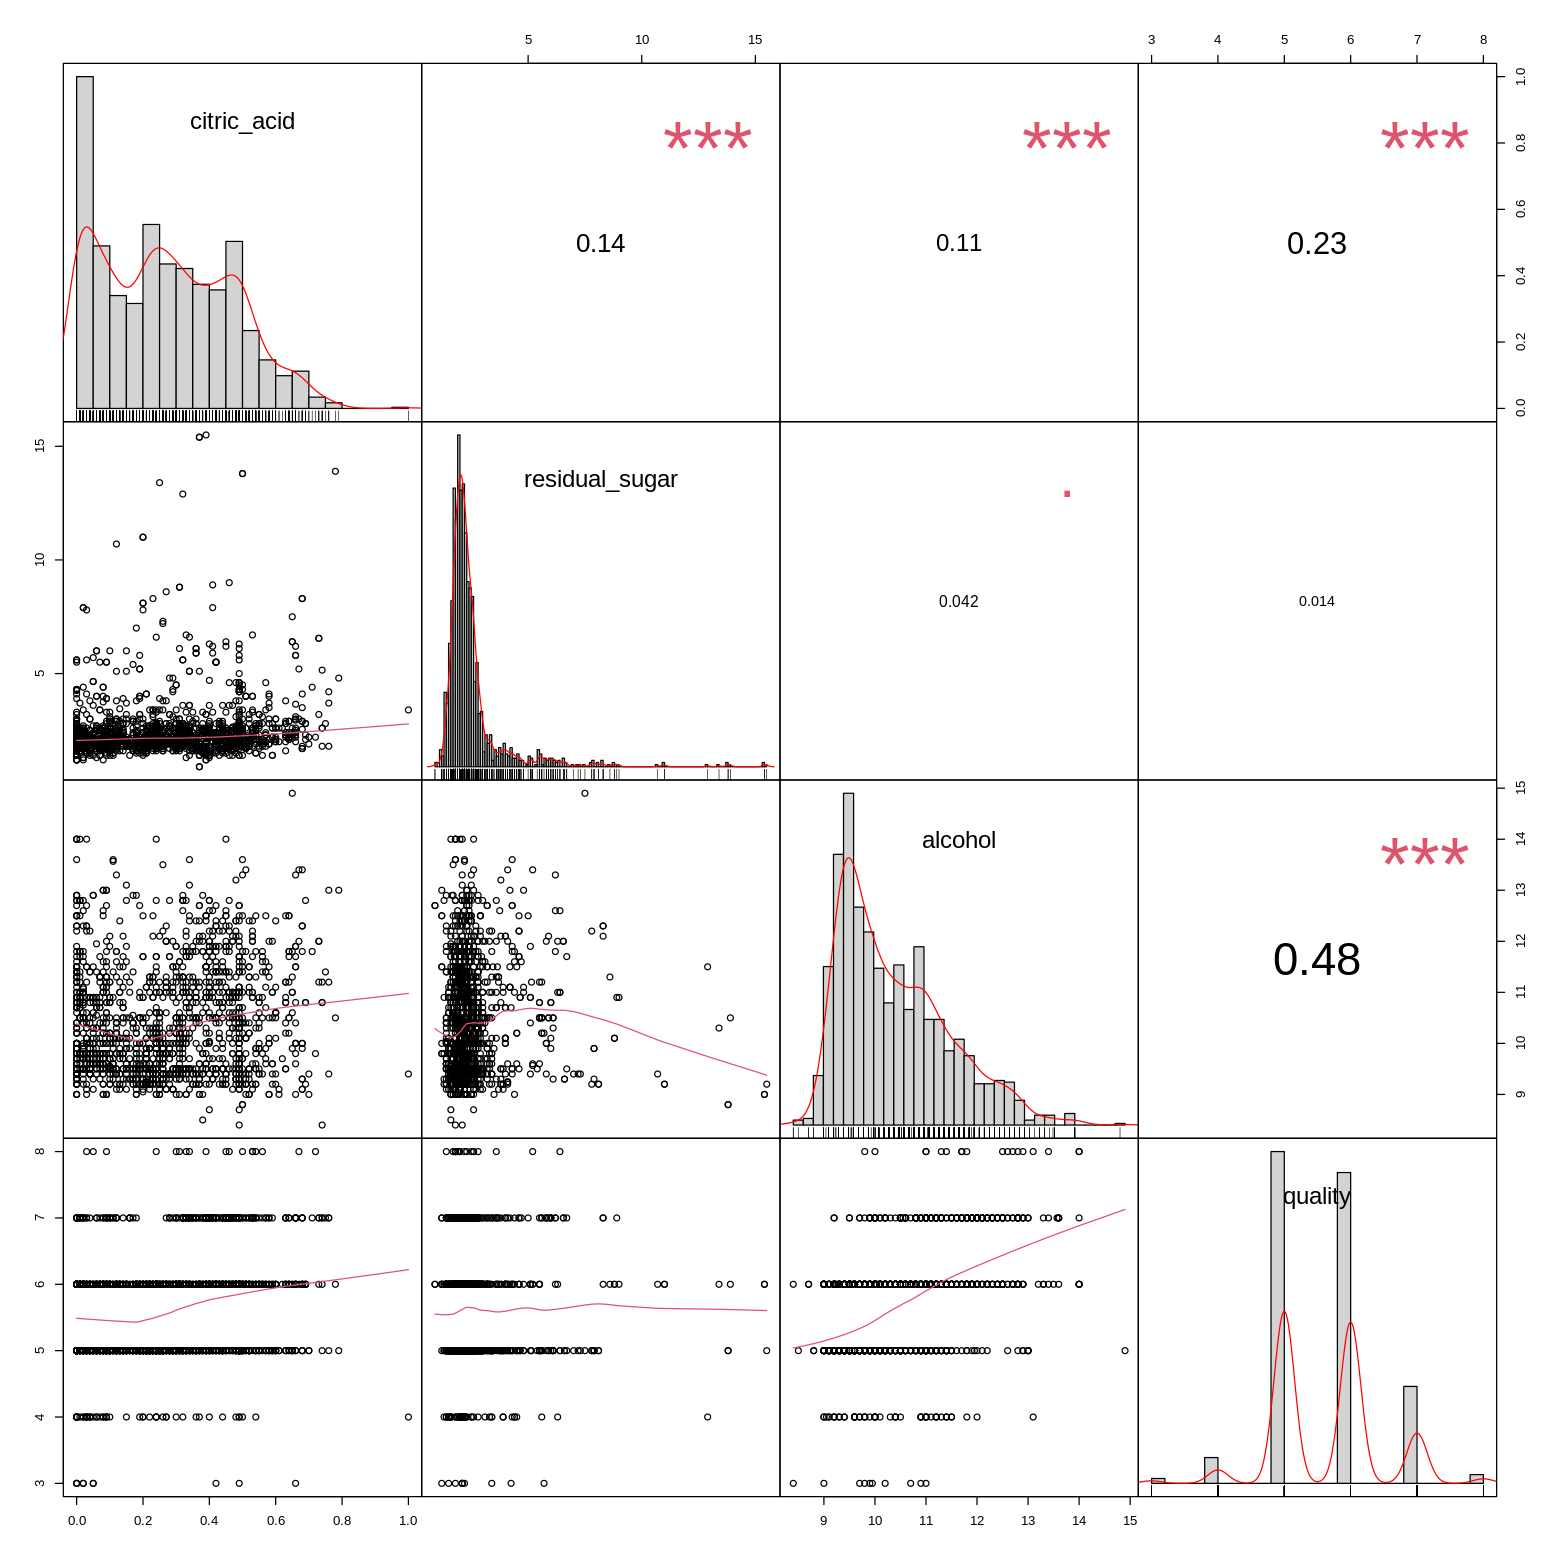

In [298]:
chart.Correlation(DF2, histogram=TRUE, pch=19)

List of 6
 $ stats: num [1:5, 1:4] 0 0.09 0.26 0.42 0.79 0.9 1.9 2.2 2.6 3.65 ...
 $ n    : num [1:4] 1599 1599 1599 1599
 $ conf : num [1:2, 1:4] 0.247 0.273 2.172 2.228 10.137 ...
 $ out  : num [1:197] 1 6.1 6.1 3.8 3.9 4.4 10.7 5.5 5.9 5.9 ...
 $ group: num [1:197] 1 2 2 2 2 2 2 2 2 2 ...
 $ names: chr [1:4] "citric_acid" "residual_sugar" "alcohol" "quality"


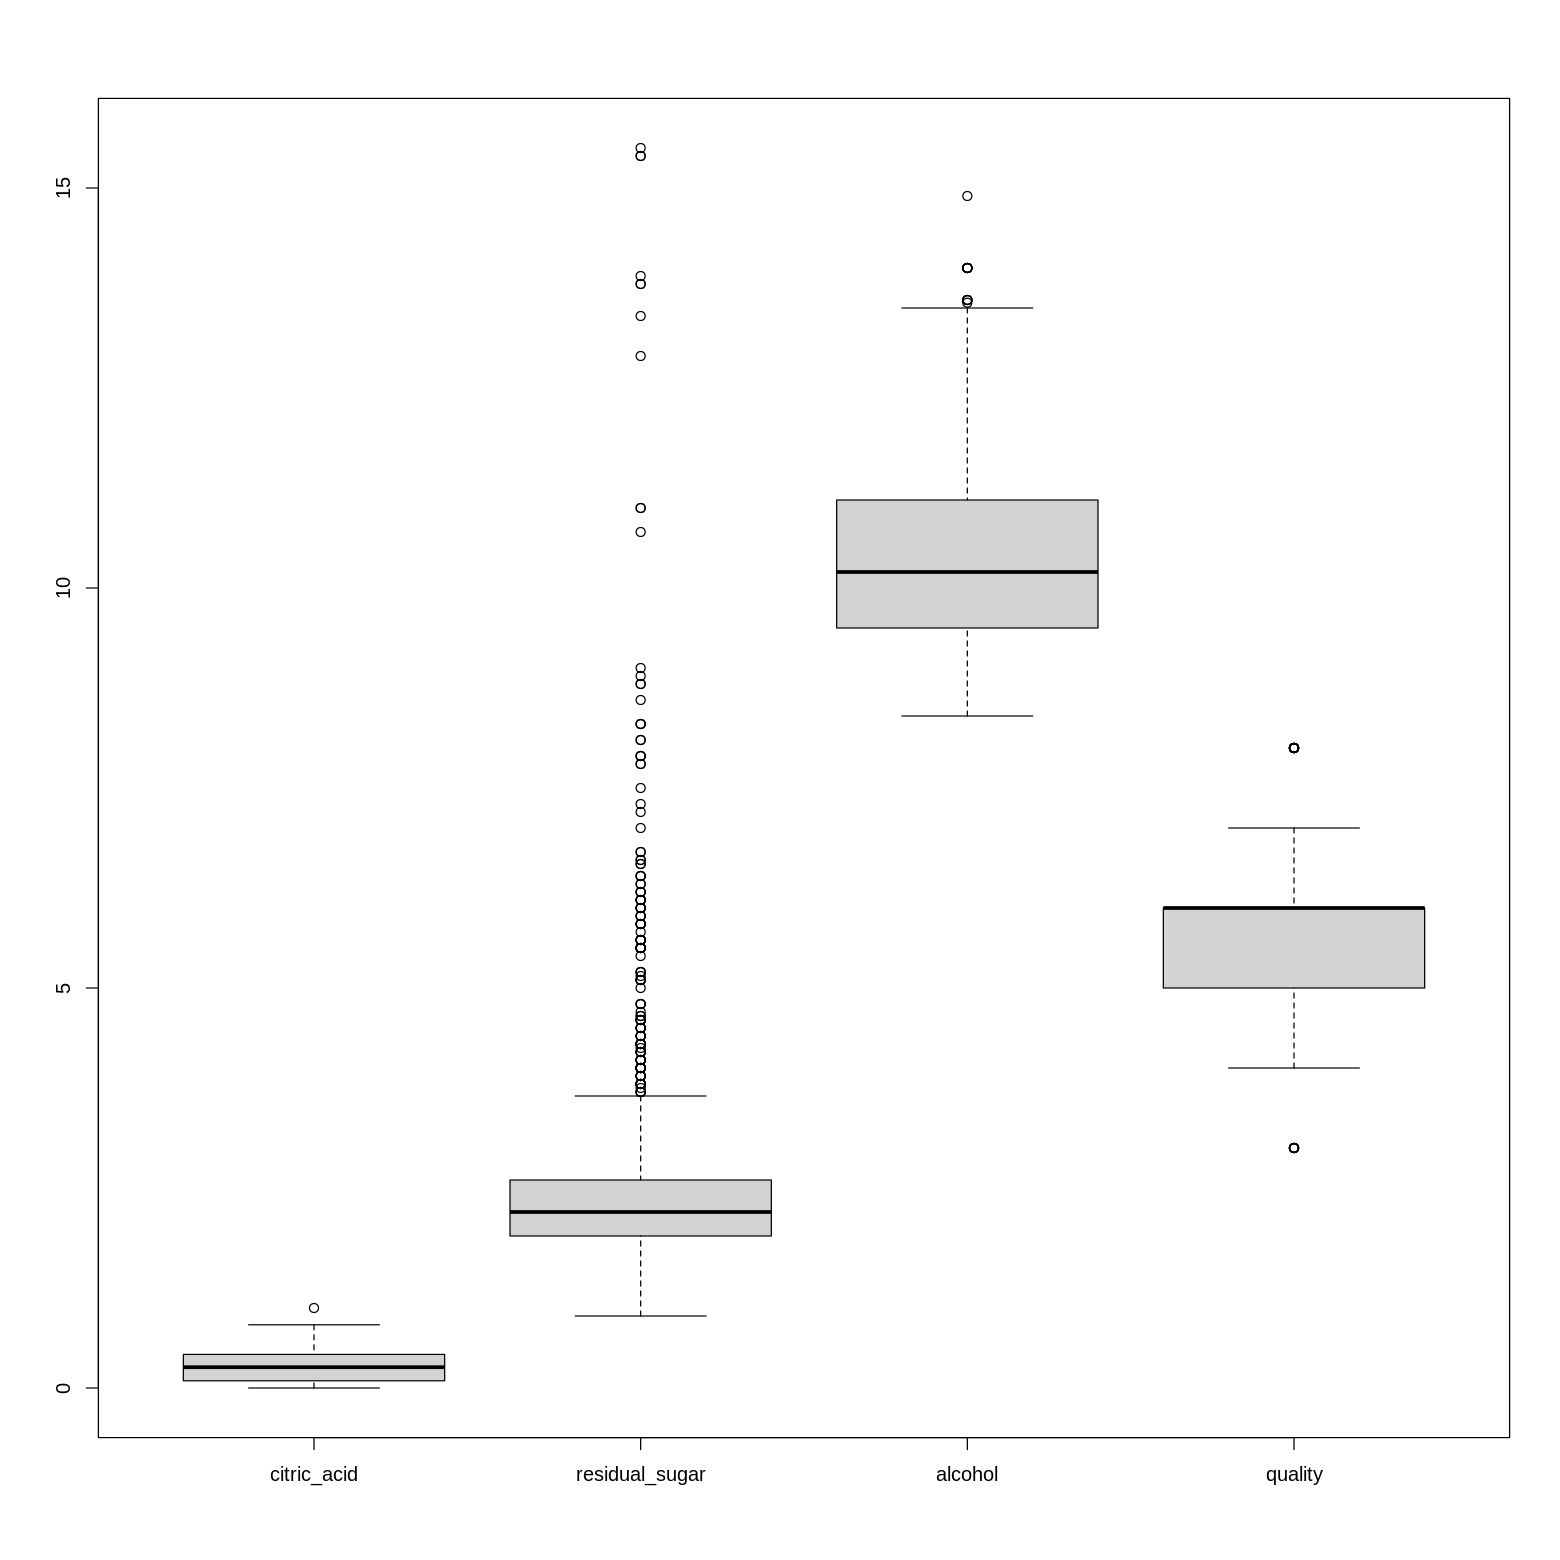

In [299]:
boxplot(DF2)
str(boxplot(DF2, plot = F))

* 적절한 반응변수와 설명변수의 설정

```
반응변수 : quality
설명변수 : citric_acid, residual_sugar, alcohol
설정한 이유 : 이 데이터가 와인의 품질에 영향을 미치는 여러 요소를 가진 데이터이기 때문에 quality를 반응변수로 설정하고, 설명변수를 citric_acid, residual_sugar, alcohol로 설정함
```

* Train / Test set 분리 후 회귀식 추정

In [300]:
# "caTools::sample.split", "caret:"sample.split", "lm" 활용
library(caret)
library(caTools)

In [301]:
?createDataPartition
trainIndex <- caret::createDataPartition(1:nrow(DF2), p = 0.80, list = F)
head(trainIndex)

DF2_train <- DF2[trainIndex, ] # 0.8
DF2_test <- DF2[-trainIndex, ] # 0.2

DF2_train.lm <- lm(DF2$quality ~ DF2$citric_acid + DF2$residual_sugar + DF2$alcohol, data = DF2_train)
summary(DF2_train.lm)

Resample1
2
3
4
5
6
8



Call:
lm(formula = DF2$quality ~ DF2$citric_acid + DF2$residual_sugar + 
    DF2$alcohol, data = DF2_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6327 -0.4104 -0.1336  0.5225  2.4514 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.86416    0.17292  10.780  < 2e-16 ***
DF2$citric_acid     0.74866    0.09083   8.242 3.48e-16 ***
DF2$residual_sugar -0.01802    0.01248  -1.443    0.149    
DF2$alcohol         0.34680    0.01645  21.087  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6961 on 1595 degrees of freedom
Multiple R-squared:  0.2584,	Adjusted R-squared:  0.257 
F-statistic: 185.2 on 3 and 1595 DF,  p-value: < 2.2e-16


In [302]:
?sample.split
trainIndex <- caTools::sample.split(1:nrow(DF2), SplitRatio = 0.80)

DF2_train <- filter(DF2, trainIndex == T)
DF2_test <- filter(DF2, trainIndex == F)

DF2_train.lm <- lm(DF2$quality ~ DF2$citric_acid + DF2$residual_sugar + DF2$alcohol, data = DF2_train)
summary(DF2_train.lm)


Call:
lm(formula = DF2$quality ~ DF2$citric_acid + DF2$residual_sugar + 
    DF2$alcohol, data = DF2_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6327 -0.4104 -0.1336  0.5225  2.4514 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.86416    0.17292  10.780  < 2e-16 ***
DF2$citric_acid     0.74866    0.09083   8.242 3.48e-16 ***
DF2$residual_sugar -0.01802    0.01248  -1.443    0.149    
DF2$alcohol         0.34680    0.01645  21.087  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6961 on 1595 degrees of freedom
Multiple R-squared:  0.2584,	Adjusted R-squared:  0.257 
F-statistic: 185.2 on 3 and 1595 DF,  p-value: < 2.2e-16


In [303]:
model2 <- lm(quality ~ citric_acid + residual_sugar + alcohol, data = DF2)
model2


Call:
lm(formula = quality ~ citric_acid + residual_sugar + alcohol, 
    data = DF2)

Coefficients:
   (Intercept)     citric_acid  residual_sugar         alcohol  
       1.86416         0.74866        -0.01802         0.34680  


* 회귀분석 결과 해석(이론 강의 참고)


In [304]:
# "summary", "plotRelWeights" 활용
summary(model2)


Call:
lm(formula = quality ~ citric_acid + residual_sugar + alcohol, 
    data = DF2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6327 -0.4104 -0.1336  0.5225  2.4514 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.86416    0.17292  10.780  < 2e-16 ***
citric_acid     0.74866    0.09083   8.242 3.48e-16 ***
residual_sugar -0.01802    0.01248  -1.443    0.149    
alcohol         0.34680    0.01645  21.087  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6961 on 1595 degrees of freedom
Multiple R-squared:  0.2584,	Adjusted R-squared:  0.257 
F-statistic: 185.2 on 3 and 1595 DF,  p-value: < 2.2e-16


F-statistic의 p-value 값은 2.2e-16 로 0.05보다 작기에 이 회귀식은 회귀분석 모델 전체에 대해 통계적으로 의미가 있다고 볼 수 있다

밑부분의 Adjusted R-squared의 값은 0.257로, 25%만큼의 설명력을 가진다고 판단할 수 있다

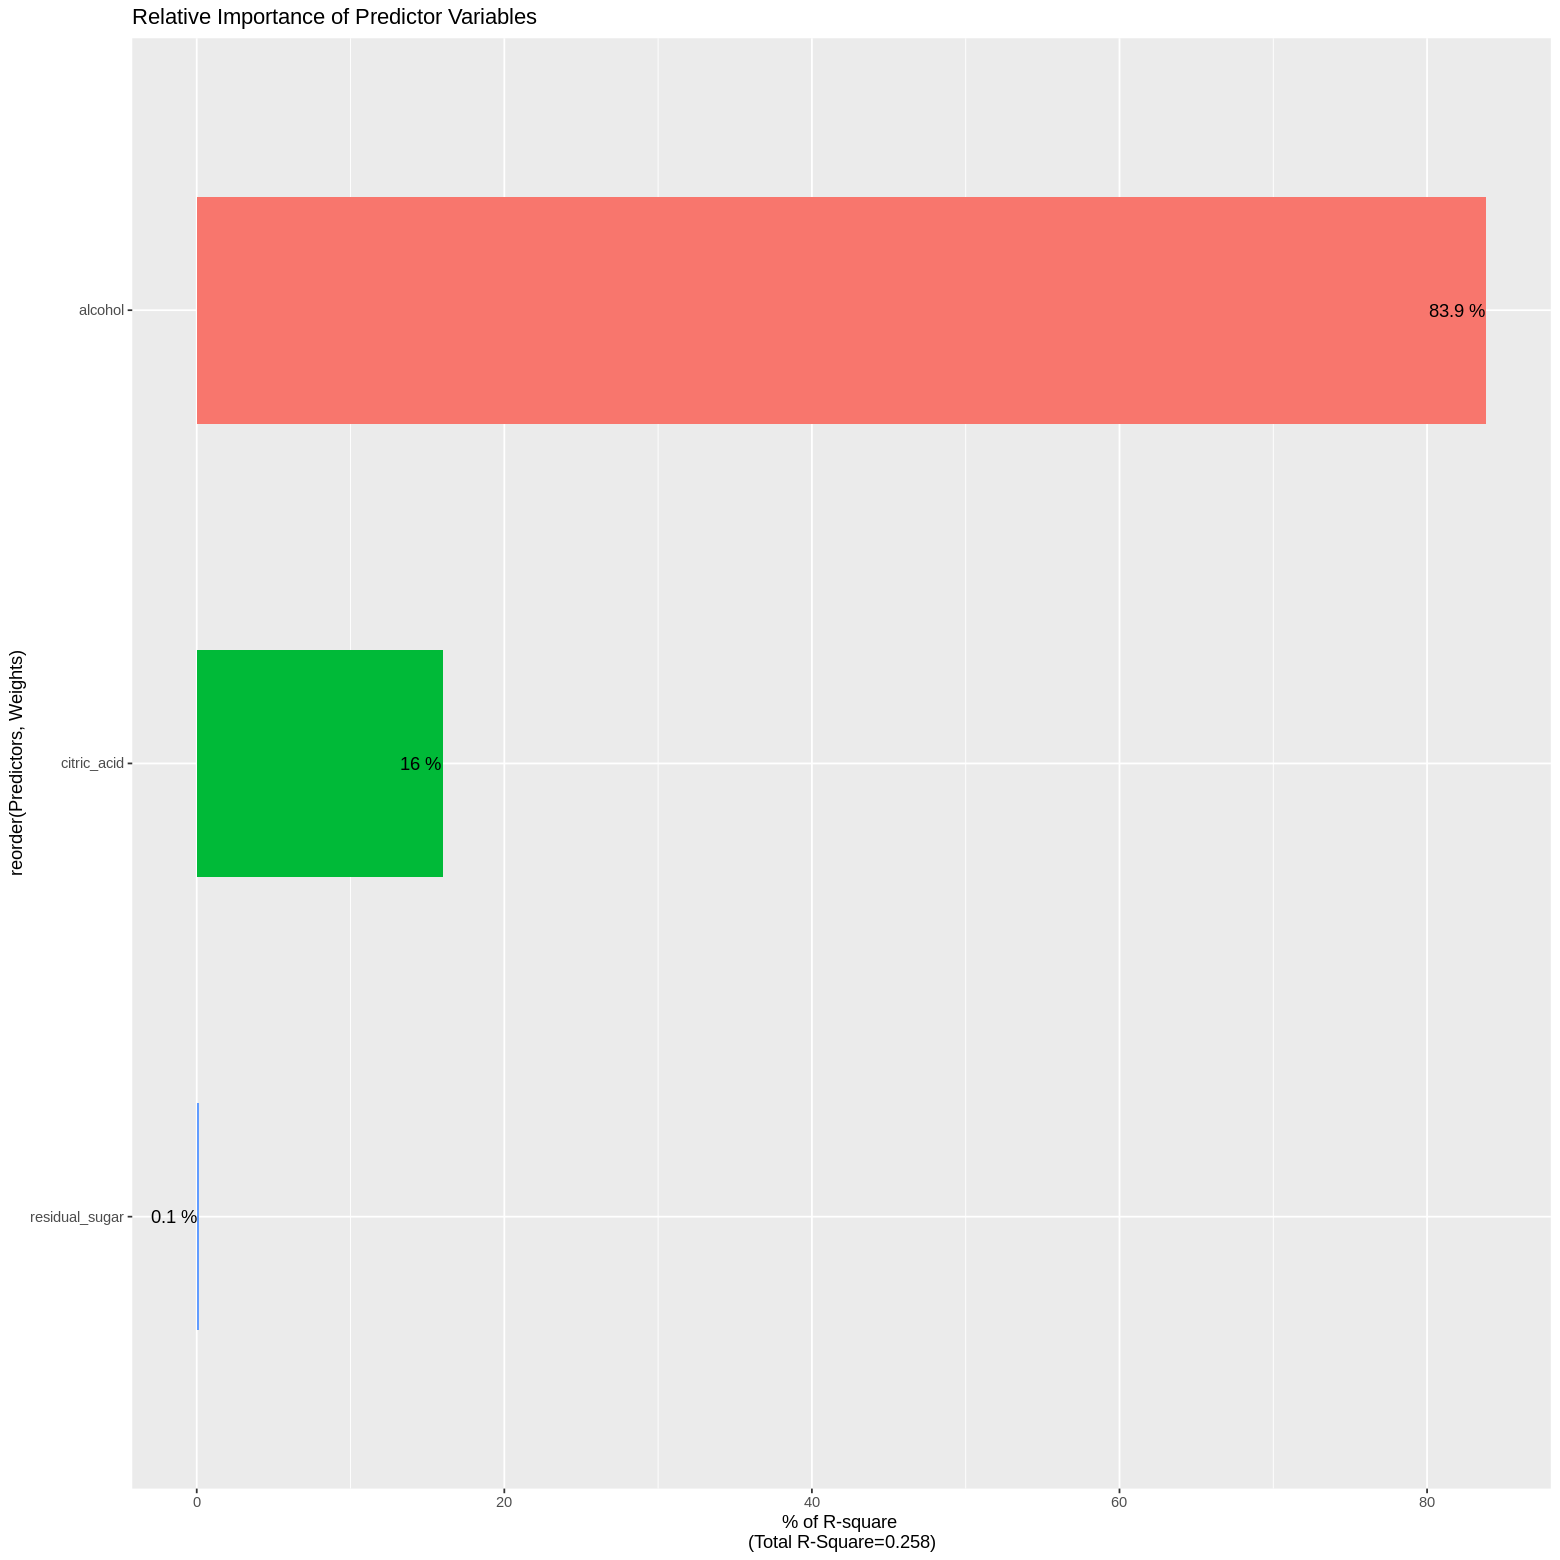

In [305]:
plotRelWeights(model2)

* Feature selection(변수 선택)

In [306]:
# "lm", "update", "step" 활용
model2_2 <- lm(quality ~ citric_acid + residual_sugar + alcohol, data = DF2)

model2_2 <- update(model2_2, .~. -residual_sugar)

model2_2 <- step(model2_2, direction = "backward")

Start:  AIC=-1154.34
quality ~ citric_acid + alcohol

              Df Sum of Sq    RSS      AIC
<none>                     773.92 -1154.34
- citric_acid  1    31.953 805.87 -1091.65
- alcohol      1   214.843 988.76  -764.61


* Test set을 이용한 Predict(예측)

In [307]:
# "predict" 활용
citric_acid_r <- sample(DF2$citric_acid, 60, replace = F)
alcohol_r <- sample(DF2$alcohol, 60, replace = F)

new_data2 <- tibble(citric_acid = citric_acid_r, alcohol = alcohol_r)
new_data2 %>% show()

# A tibble: 60 x 2
   citric_acid alcohol
         <dbl>   <dbl>
 1        0.07    12.5
 2        0.39    10  
 3        0.51    11.5
 4        0.68     9.2
 5        0.5     10.2
 6        0.26     9.5
 7        0.33     9.8
 8        0.12    11.2
 9        0.41     9.2
10        0.3     10.9
# … with 50 more rows


In [308]:
quality_r <- predict(model2_2, new_data2)

new_data2 <- new_data2 %>% bind_cols(tibble(quality_predict = quality_r))

new_data2 %>% show()

# A tibble: 60 x 3
   citric_acid alcohol quality_predict
         <dbl>   <dbl>           <dbl>
 1        0.07    12.5            6.21
 2        0.39    10              5.58
 3        0.51    11.5            6.18
 4        0.68     9.2            5.51
 5        0.5     10.2            5.73
 6        0.26     9.5            5.31
 7        0.33     9.8            5.46
 8        0.12    11.2            5.79
 9        0.41     9.2            5.31
10        0.3     10.9            5.82
# … with 50 more rows


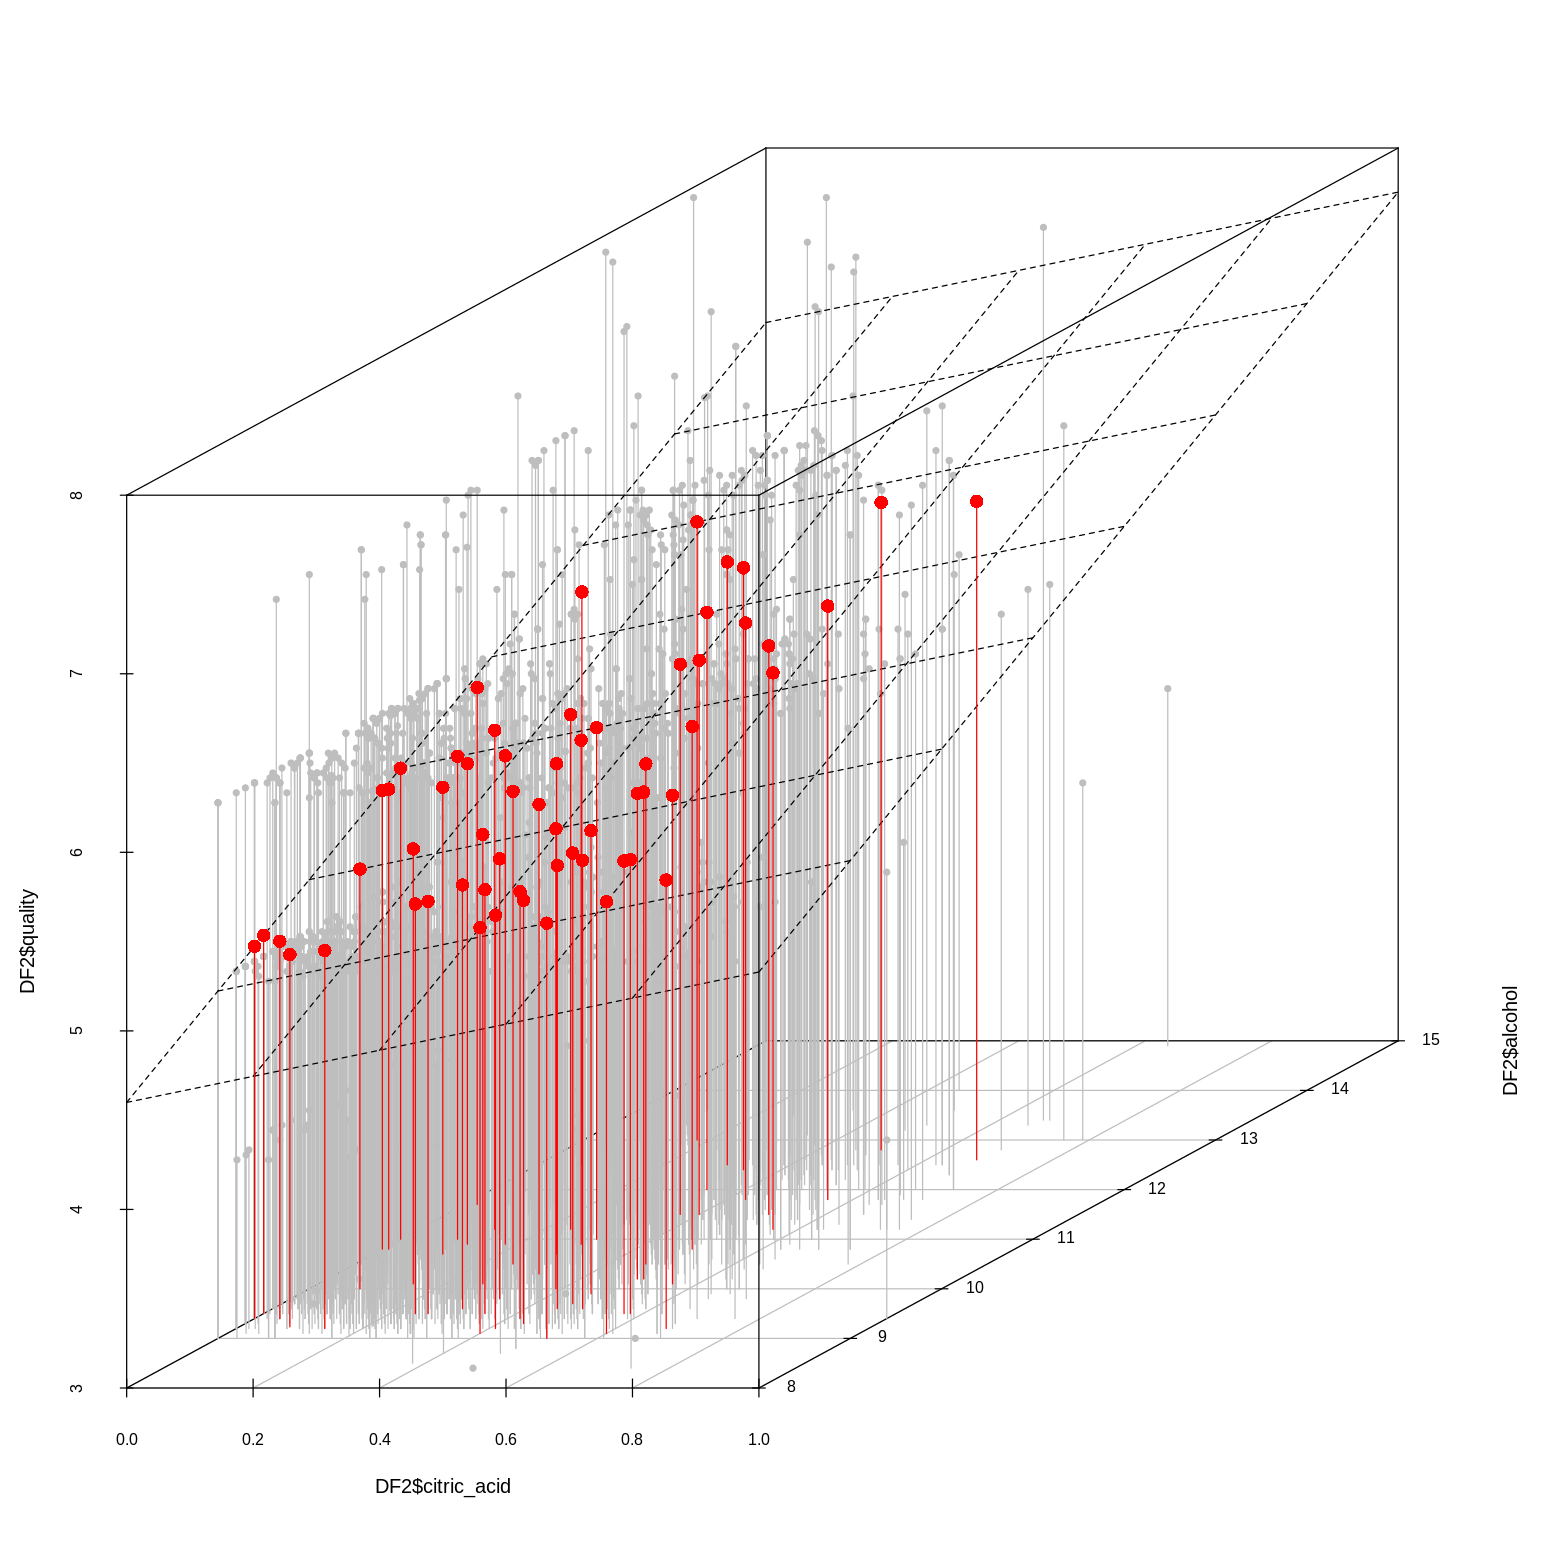

In [309]:
s <- scatterplot3d(DF2$citric_acid, DF2$alcohol, DF2$quality, pch = 20, type = 'h', angle = 25, color = "grey")
s$plane3d(model2_2)
s$points3d(new_data2$citric_acid, new_data2$alcohol, new_data2$quality_predict, col = "red", type = "h", pch = 16, cex = 1.5)